# Project 3
### Teammember: Dengyi Liu, Yuchen Wang

# Introduction

The dataset contains information related to New York State High School graduation metrics for the 2018-2019 academic year. It comprises approximately 73,000 records and 19 columns, focusing on various subgroupings and categorizations of high school students who have been enrolled for at least four years as of the end of the 2018-19 school year.

__TASKS__:

- Predict the number of students dropping out of school using the available information  

__Methodology for the Study__:

- Perform exploratory data analysis
- Prepare the data
- Reduce dimensionality
- Implement a Decision Tree model
- Implement a Random Forest model
- Implement Gradient Boosting Classifier
- Implement Stochastic Gradient Descent Classifier
- Implement XG Boosting Classifier
- Conclusions

# Pre-Work

### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math
from numpy import random
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
import statsmodels.api as sm
from xgboost import XGBClassifier

### Load the data

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/DengyiLiu/Data-Science-Project-3/main/M11_Data.csv')
data.head(10)

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   
5            2018-19                  3         District   
6            2018-19                  3         District   
7            2018-19                  3         District   
8            2018-19                  3         District   
9            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
5  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
6  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
7  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
8  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
9  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
5            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
6            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
7            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
8            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
9            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   

   subgroup_code                  subgroup_name enroll_cnt grad_cnt grad_pct  \
0              1                   All Students        658      464      71%   
1              2                         Female        324      246      76%   
2              3                           Male        334      218      65%   
3              4  American Indian/Alaska Native          -        -        -   
4              5                          Black        367      248      68%   
5              6                       Hispanic         98       58      59%   
6              7         Asian/Pacific Islander         46       38      83%   
7              8                          White        130      105      81%   
8              9                    Multiracial          -        -        -   
9             10     General Education Students        544      415      76%   

  reg_cnt reg_pct dropout_cnt dropout_pct  
0     310     47%         148         22%  
1     169     52%          65         20%  
2     141     42%          83         25%  
3       -       -           -           -  
4     183     50%          91         25%  
5      40     41%          28         29%  
6      26     57%           8         17%  
7      50     38%          19         15%  
8       -       -           -           -  
9     297     55%         114         21%

### Data Overview

In [5]:
data.shape

(73152, 19)

In [6]:
data.isnull().sum()

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
enroll_cnt            0
grad_cnt              0
grad_pct              0
reg_cnt               0
reg_pct               0
dropout_cnt           0
dropout_pct           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct             73

There are no null values in the data as per info but if you look closely, you will find "-"(hyphen/dash) in the obervations. Few also has "%"(percentage) sign

That's the reason it says object datatype in the information for columns 12 to 28

Let's replace the "-" with 0 and "%" with nothing and convert it to numeric datatype. This would help us in Exploratory data analysis and building graphs

### Data Processing

In [8]:
data.replace('-',0,inplace = True)
data = data.replace('%','',regex = True)

In [9]:
data

report_school_year  aggregation_index aggregation_type  \
0                2018-19                  3         District   
1                2018-19                  3         District   
2                2018-19                  3         District   
3                2018-19                  3         District   
4                2018-19                  3         District   
...                  ...                ...              ...   
73147            2018-19                  3         District   
73148            2018-19                  3         District   
73149            2018-19                  3         District   
73150            2018-19                  3         District   
73151            2018-19                  3         District   

                     aggregation_name  nrc_code                   nrc_desc  \
0         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
...                               ...       ...                        ...   
73147  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73148  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73149  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73150  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73151  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   

       county_code county_name  nyc_ind  \
0                1      ALBANY        0   
1                1      ALBANY        0   
2                1      ALBANY        0   
3                1      ALBANY        0   
4                1      ALBANY        0   
...            ...         ...      ...   
73147           68       YATES        0   
73148           68       YATES        0   
73149           68       YATES        0   
73150           68       YATES        0   
73151           68       YATES        0   

                                        membership_desc  subgroup_code  \
0                    2013 Total Cohort - 6 Year Outcome              1   
1                    2013 Total Cohort - 6 Year Outcome              2   
2                    2013 Total Cohort - 6 Year Outcome              3   
3                    2013 Total Cohort - 6 Year Outcome              4   
4                    2013 Total Cohort - 6 Year Outcome              5   
...                                                 ...            ...   
73147  2013 Total Cohort - 6 Year Outcome - August 2019             18   
73148  2013 Total Cohort - 6 Year Outcome - August 2019             20   
73149  2013 Total Cohort - 6 Year Outcome - August 2019             21   
73150  2013 Total Cohort - 6 Year Outcome - August 2019             23   
73151  2013 Total Cohort - 6 Year Outcome - August 2019             25   

                       subgroup_name enroll_cnt grad_cnt grad_pct reg_cnt  \
0                       All Students        658      464       71     310   
1                             Female        324      246       76     169   
2                               Male        334      218       65     141   
3      American Indian/Alaska Native          0        0        0       0   
4                              Black        367      248       68     183   
...                              ...        ...      ...      ...     ...   
73147                    Not Migrant          0        0        0       0   
73148                       Homeless          0        0        0       0   
73149                   Not Homeless          0        0        0       0   
73150             Not in Foster Care          0        0        0       0   
73151     Parent Not in Armed Forces          0

In [10]:
data.iloc[:,12:]= data.iloc[:,12:].apply(pd.to_numeric)

**Now, let's check the data type again.**

In [11]:
data.iloc[:,12:]

enroll_cnt  grad_cnt  grad_pct  reg_cnt  reg_pct  dropout_cnt  \
0             658       464        71      310       47          148   
1             324       246        76      169       52           65   
2             334       218        65      141       42           83   
3               0         0         0        0        0            0   
4             367       248        68      183       50           91   
...           ...       ...       ...      ...      ...          ...   
73147           0         0         0        0        0            0   
73148           0         0         0        0        0            0   
73149           0         0         0        0        0            0   
73150           0         0         0        0        0            0   
73151           0         0         0        0        0            0   

       dropout_pct  
0               22  
1               20  
2               25  
3                0  
4               25  
...            ...  
73147            0  
73148            0  
73149            0  
73150            0  
73151            0  

[73152 rows x 7 columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  int64 
 13  grad_cnt            73152 non-null  int64 
 14  grad_pct            73152 non-null  int64 
 15  reg_cnt             73152 non-null  int64 
 16  reg_pct             73

In [13]:
data.describe().T

count        mean         std  min   25%   50%   75%  \
aggregation_index  73152.0    3.000000    0.000000  3.0   3.0   3.0   3.0   
nrc_code           73152.0    4.588583    1.203507  1.0   4.0   5.0   5.0   
county_code        73152.0   36.251859   20.588044  1.0  17.0  40.0  57.0   
nyc_ind            73152.0    0.055255    0.228479  0.0   0.0   0.0   0.0   
subgroup_code      73152.0   12.000930    7.213138  1.0   6.0  11.0  18.0   
enroll_cnt         73152.0  104.196358  337.855150  0.0   0.0   9.0  76.0   
grad_cnt           73152.0   87.415108  277.925141  0.0   0.0   7.0  66.0   
grad_pct           73152.0   45.777942   43.608471  0.0   0.0  60.0  90.0   
reg_cnt            73152.0   47.078549  171.816777  0.0   0.0   3.0  31.0   
reg_pct            73152.0   23.522337   25.018894  0.0   0.0  20.0  45.0   
dropout_cnt        73152.0    8.807346   37.793736  0.0   0.0   0.0   3.0   
dropout_pct        73152.0    4.318761    8.144601  0.0   0.0   0.0   6.0   

                      max  
aggregation_index     3.0  
nrc_code              6.0  
county_code          68.0  
nyc_ind               1.0  
subgroup_code        25.0  
enroll_cnt         9176.0  
grad_cnt           7540.0  
grad_pct            100.0  
reg_cnt            4752.0  
reg_pct             100.0  
dropout_cnt        1091.0  
dropout_pct         100.0

# EDA

### Check the missing value again

In [14]:
data.duplicated().sum()

0

### Histogram of each numeric variable in the dataset

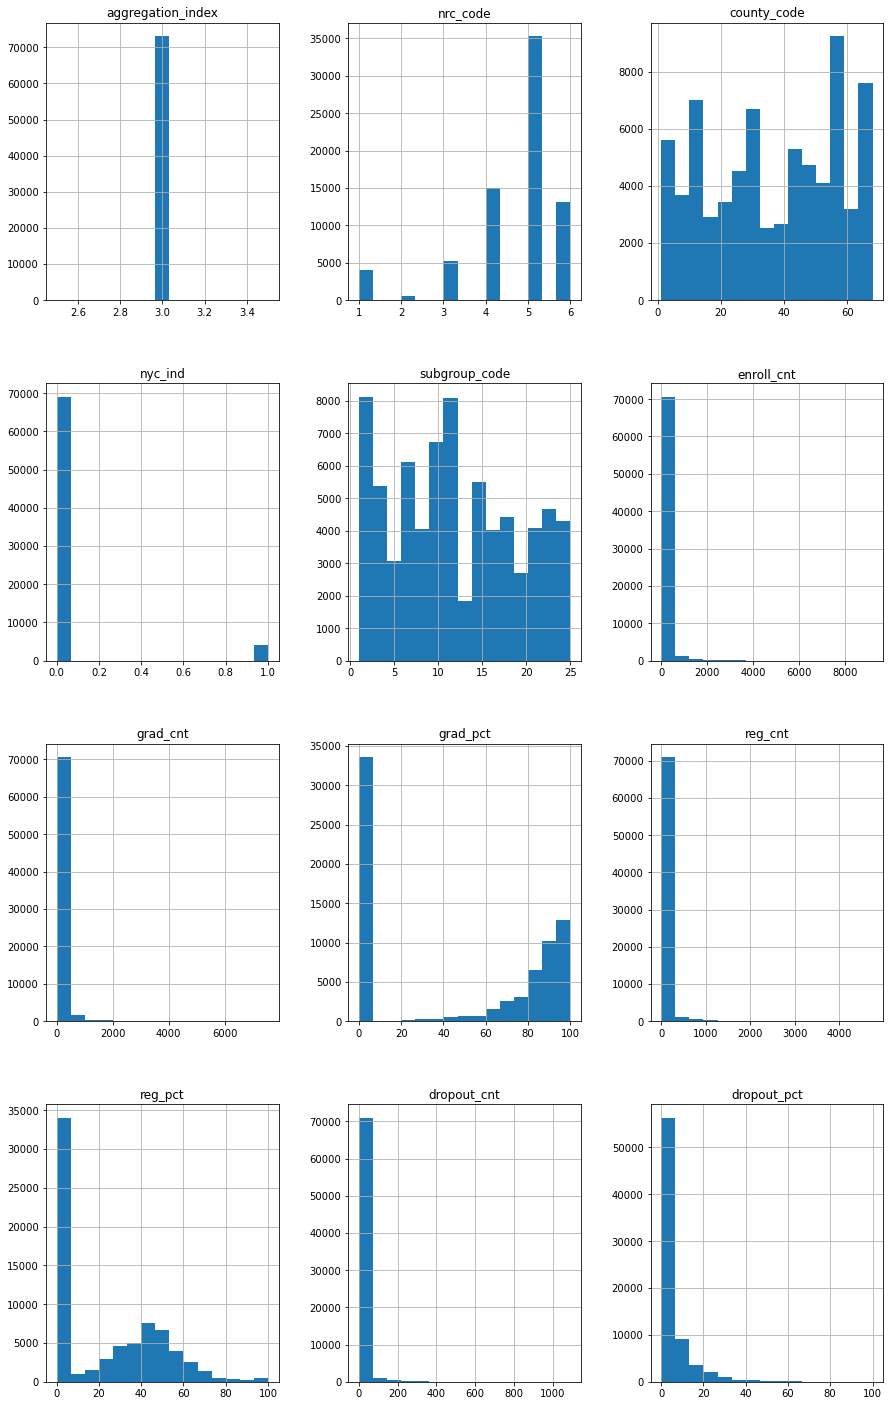

In [15]:
data.hist(bins = 15,figsize=(15,25));

### Let's check the boxplot for each variable.

In [16]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns

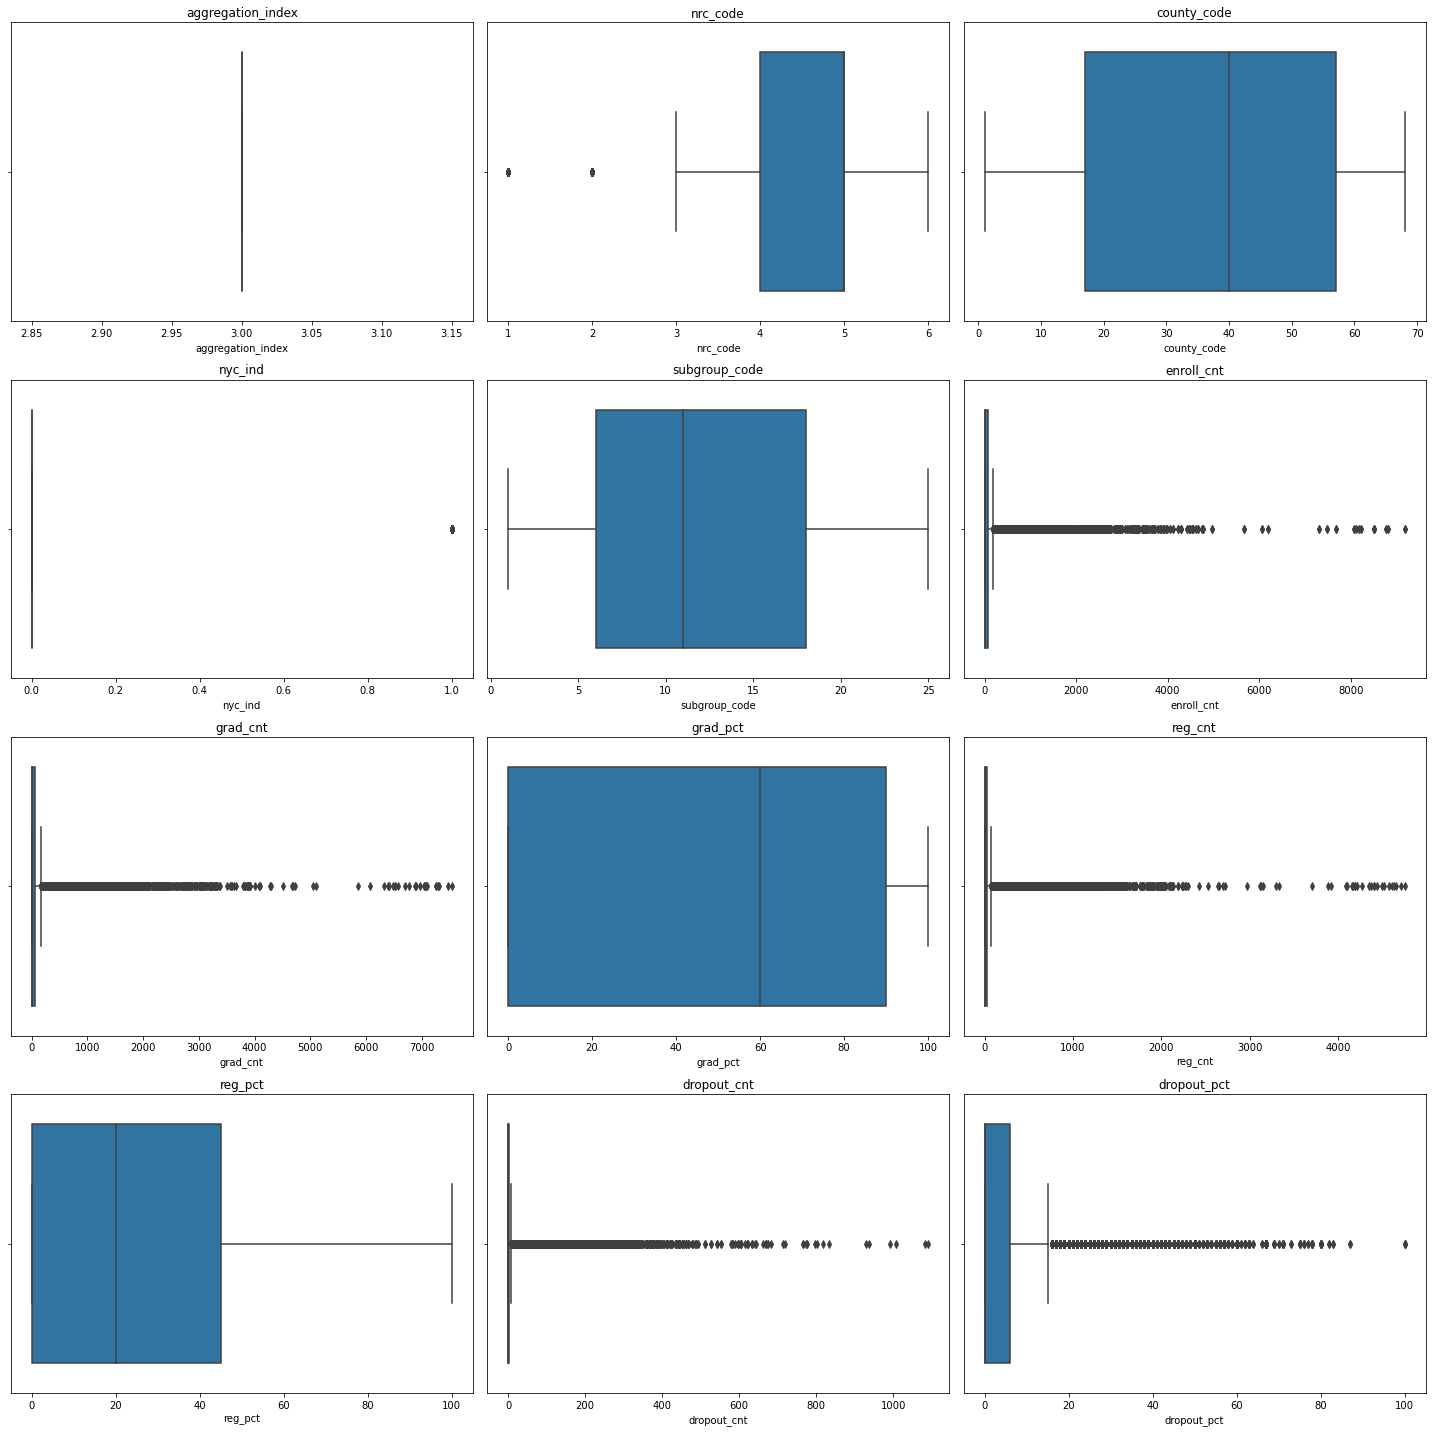

In [17]:
# This functions plots the boxplot of the data
 
plt.figure(figsize=(20,20))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.boxplot(data[col])
    plt.tight_layout()
    plt.title(col)

**Observations:**
- In the above box plots we can see that many data points lie outside the 4th quartile but these are not outliers. There is no specific range we can define to calculate the drop out percentages and so we are not consider any observations as outliers

In [18]:
#This functions plots the estimated probability density function of the data

#plt.figure(figsize=(20,30))
#for i,col in enumerate(numeric_cols):
#    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
#    sns.distplot(data[col],label=col,kde=True)
#    plt.tight_layout()
#    plt.title(col)

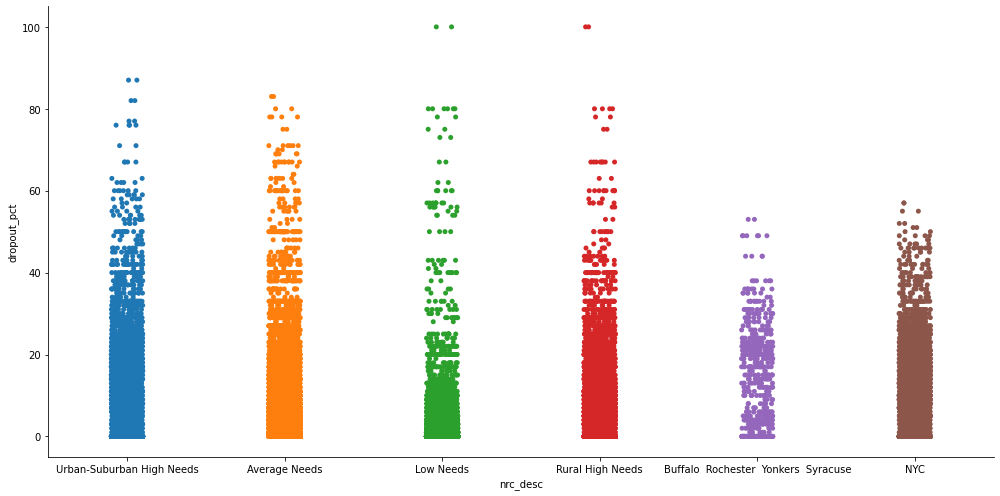

In [19]:
sns.catplot(data = data, x = 'nrc_desc',y = 'dropout_pct',height = 7,aspect = 2)

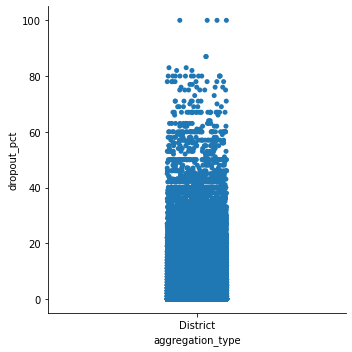

In [20]:
sns.catplot(data = data, x = 'aggregation_type',y = 'dropout_pct')

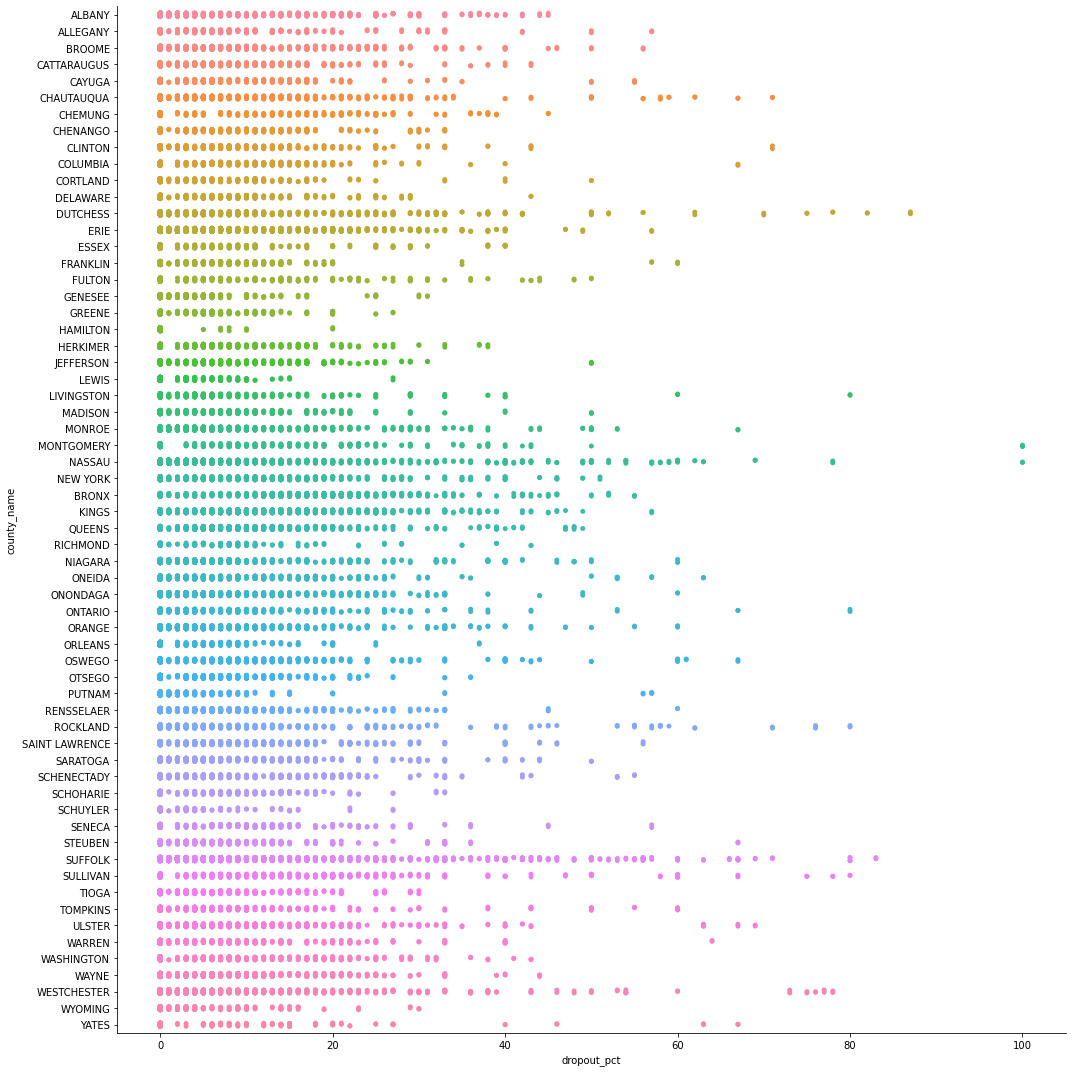

In [21]:
sns.catplot(data = data, x = 'dropout_pct',y = 'county_name',height = 15,aspect = 1)

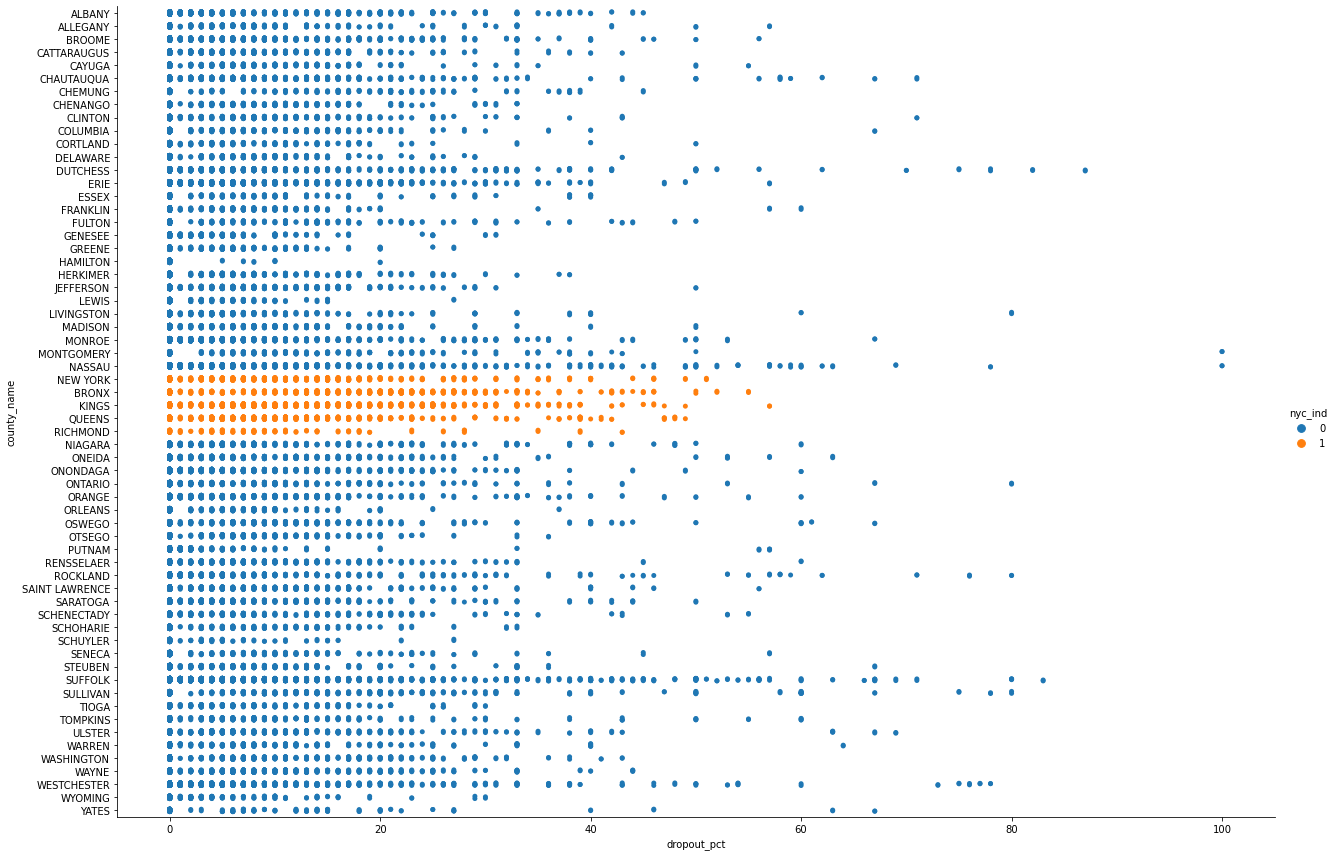

In [22]:
sns.catplot(data = data, x = 'dropout_pct',y = 'county_name',hue = 'nyc_ind',height = 12,aspect = 1.5)

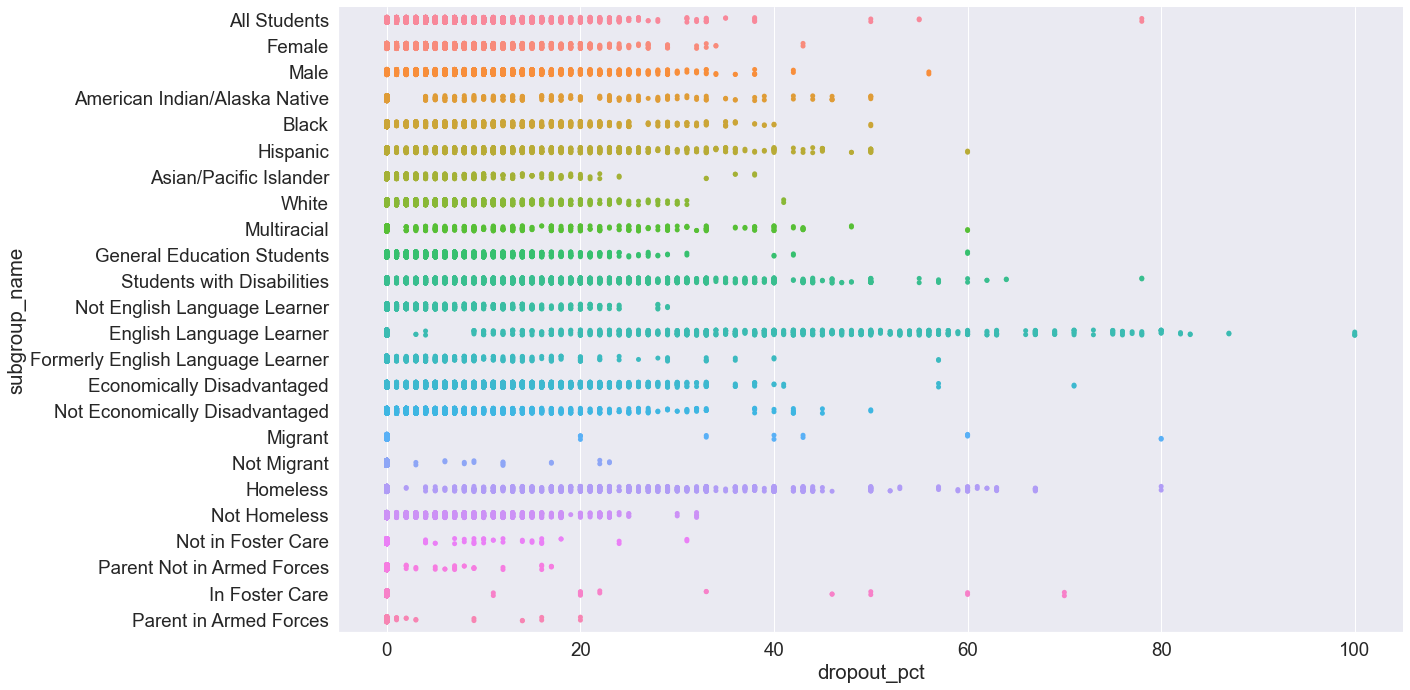

In [23]:
sns.set(font_scale = 1.7)
sns.catplot(data = data, x = 'dropout_pct',y = 'subgroup_name',height = 10,aspect = 2)

In [24]:
data.corr()

aggregation_index  nrc_code  county_code   nyc_ind  \
aggregation_index                NaN       NaN          NaN       NaN   
nrc_code                         NaN  1.000000     0.155944 -0.721116   
county_code                      NaN  0.155944     1.000000 -0.041471   
nyc_ind                          NaN -0.721116    -0.041471  1.000000   
subgroup_code                    NaN -0.001332    -0.003399 -0.012789   
enroll_cnt                       NaN -0.370565     0.001552  0.478901   
grad_cnt                         NaN -0.336467     0.006957  0.454320   
grad_pct                         NaN -0.034387     0.034183  0.088602   
reg_cnt                          NaN -0.390139     0.007191  0.486583   
reg_pct                          NaN -0.168245     0.046546  0.169397   
dropout_cnt                      NaN -0.445615    -0.023348  0.481883   
dropout_pct                      NaN -0.311863    -0.009952  0.198903   

                   subgroup_code  enroll_cnt  grad_cnt  grad_pct   reg_cnt  \
aggregation_index            NaN         NaN       NaN       NaN       NaN   
nrc_code               -0.001332   -0.370565 -0.336467 -0.034387 -0.390139   
county_code            -0.003399    0.001552  0.006957  0.034183  0.007191   
nyc_ind                -0.012789    0.478901  0.454320  0.088602  0.486583   
subgroup_code           1.000000   -0.118748 -0.124014 -0.487166 -0.103434   
enroll_cnt             -0.118748    1.000000  0.994110  0.269610  0.980664   
grad_cnt               -0.124014    0.994110  1.000000  0.287364  0.972409   
grad_pct               -0.487166    0.269610  0.287364  1.000000  0.237181   
reg_cnt                -0.103434    0.980664  0.972409  0.237181  1.000000   
reg_pct                -0.413532    0.266999  0.269744  0.868859  0.285487   
dropout_cnt            -0.078063    0.853826  0.806139  0.157069  0.858411   
dropout_pct            -0.153404    0.156408  0.125488  0.291551  0.150880   

                    reg_pct  dropout_cnt  dropout_pct  
aggregation_index       NaN          NaN          NaN  
nrc_code          -0.168245    -0.445615    -0.311863  
county_code        0.046546    -0.023348    -0.009952  
nyc_ind            0.169397     0.481883     0.198903  
subgroup_code     -0.413532    -0.078063    -0.153404  
enroll_cnt         0.266999     0.853826     0.156408  
grad_cnt           0.269744     0.806139     0.125488  
grad_pct           0.868859     0.157069     0.291551  
reg_cnt            0.285487     0.858411     0.150880  
reg_pct            1.000000     0.219366     0.347604  
dropout_cnt        0.219366     1.000000     0.301182  
dropout_pct        0.347604     0.301182     1.000000

<AxesSubplot:>

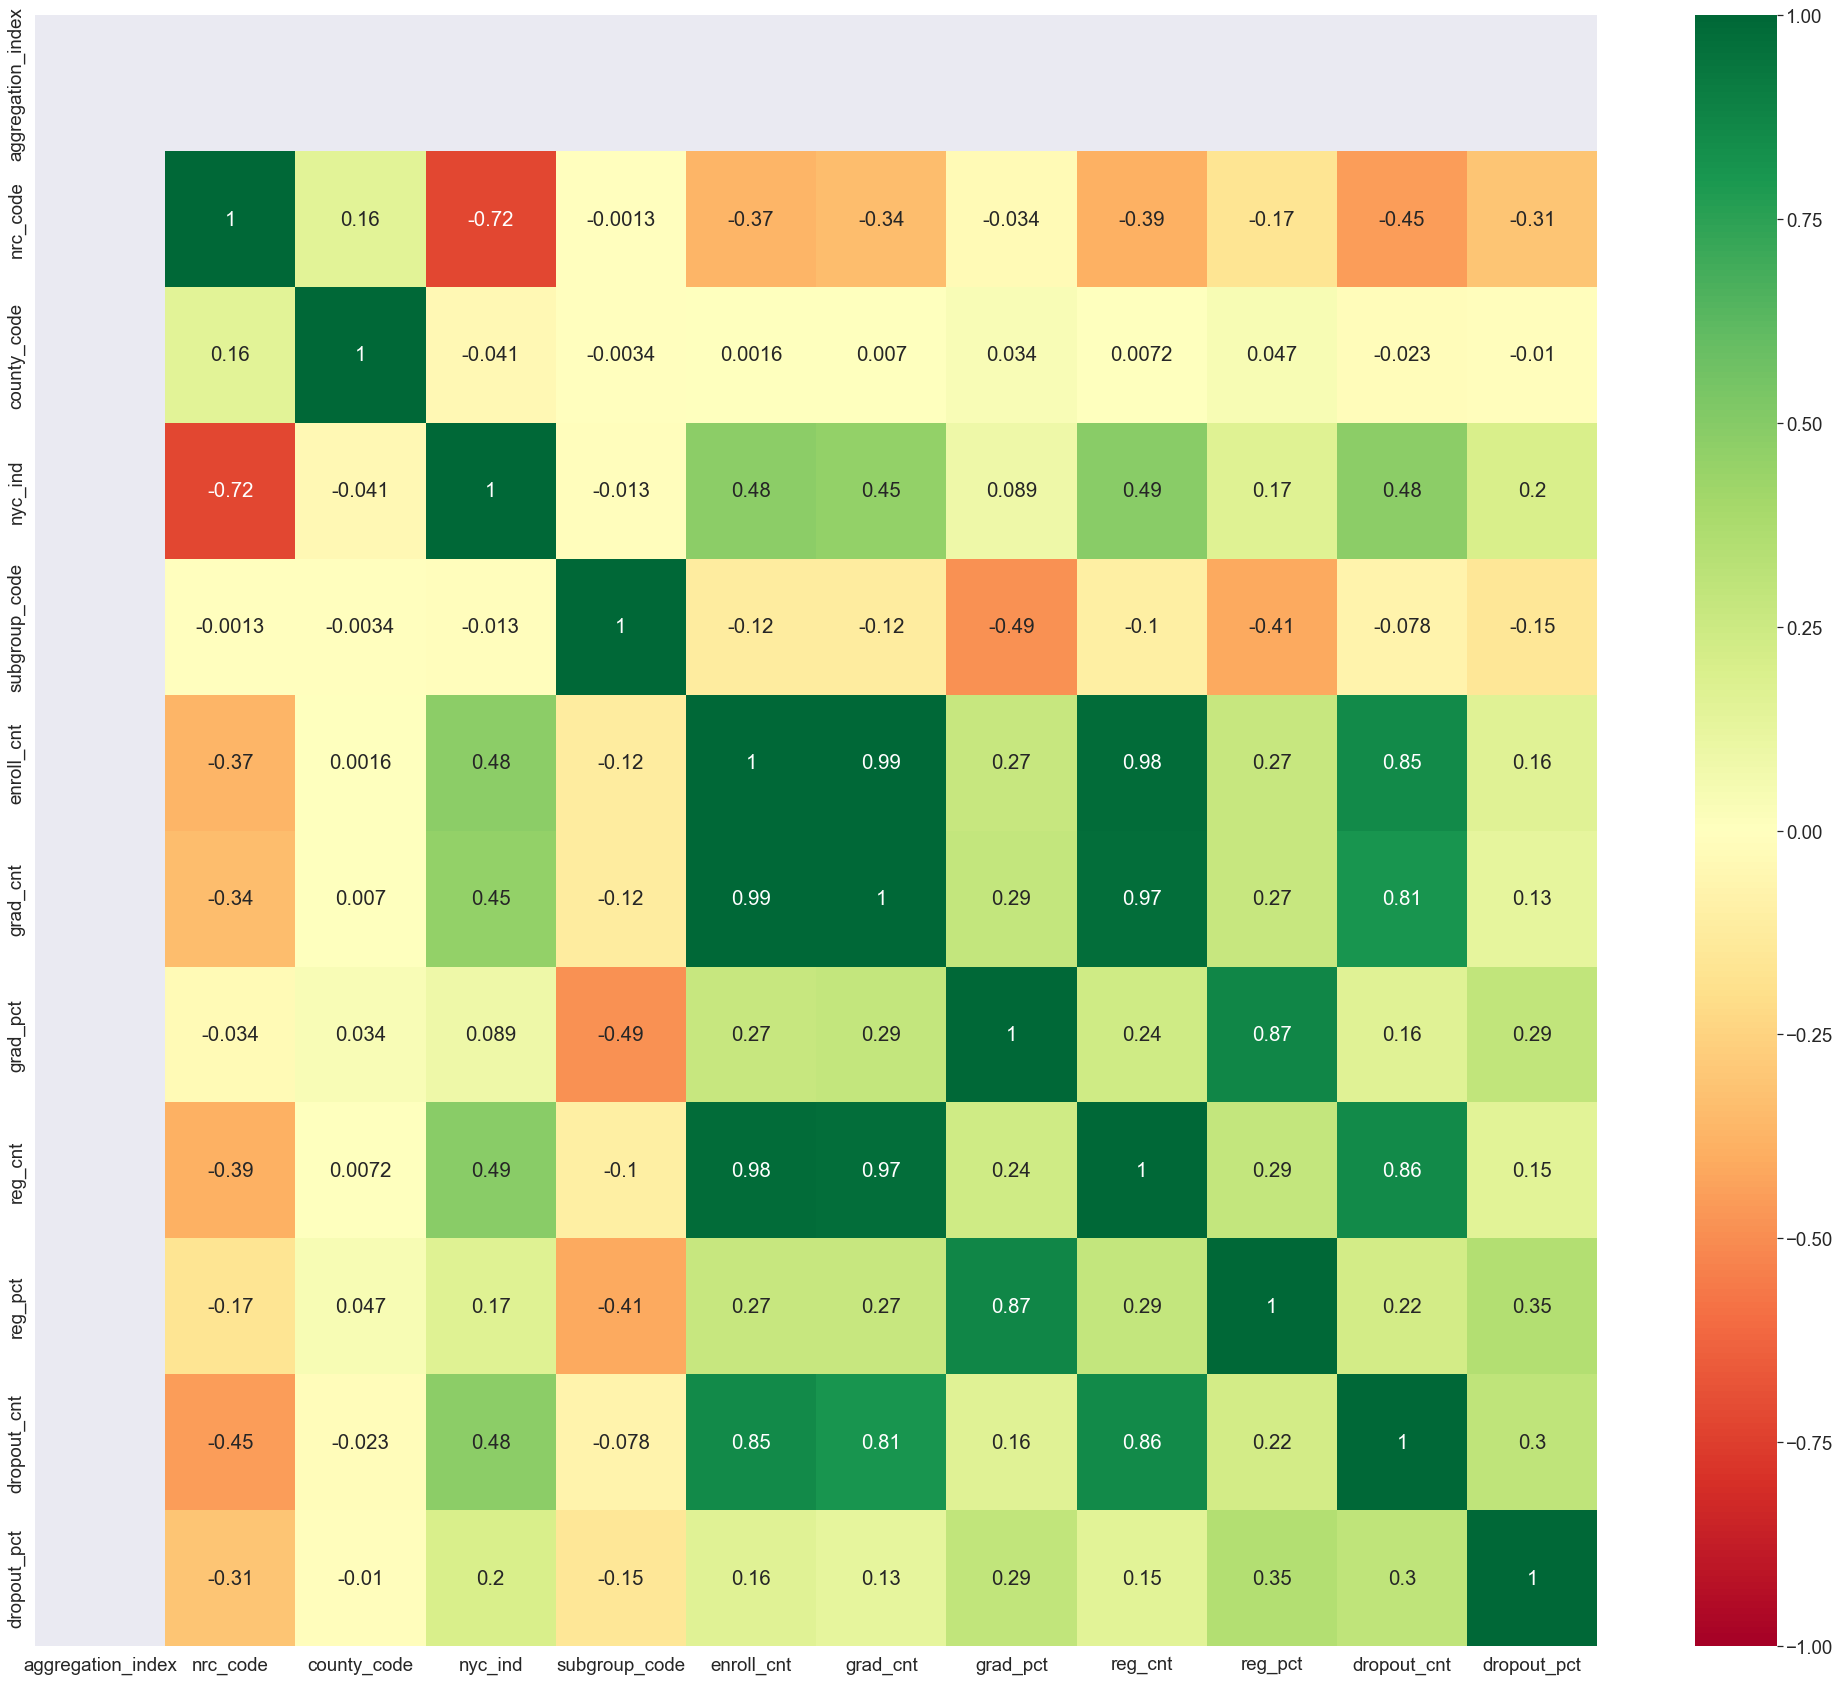

In [25]:
plt.figure(figsize=(35,30))
sns.heatmap(data.corr(),cmap='RdYlGn',vmin = -1, vmax = 1,annot=True)

In [26]:
#considering explanatory variables with good correlation and doing regression plot
var = ['enroll_cnt', 'grad_cnt', 'reg_cnt', 'nyc_ind', 'reg_cnt']

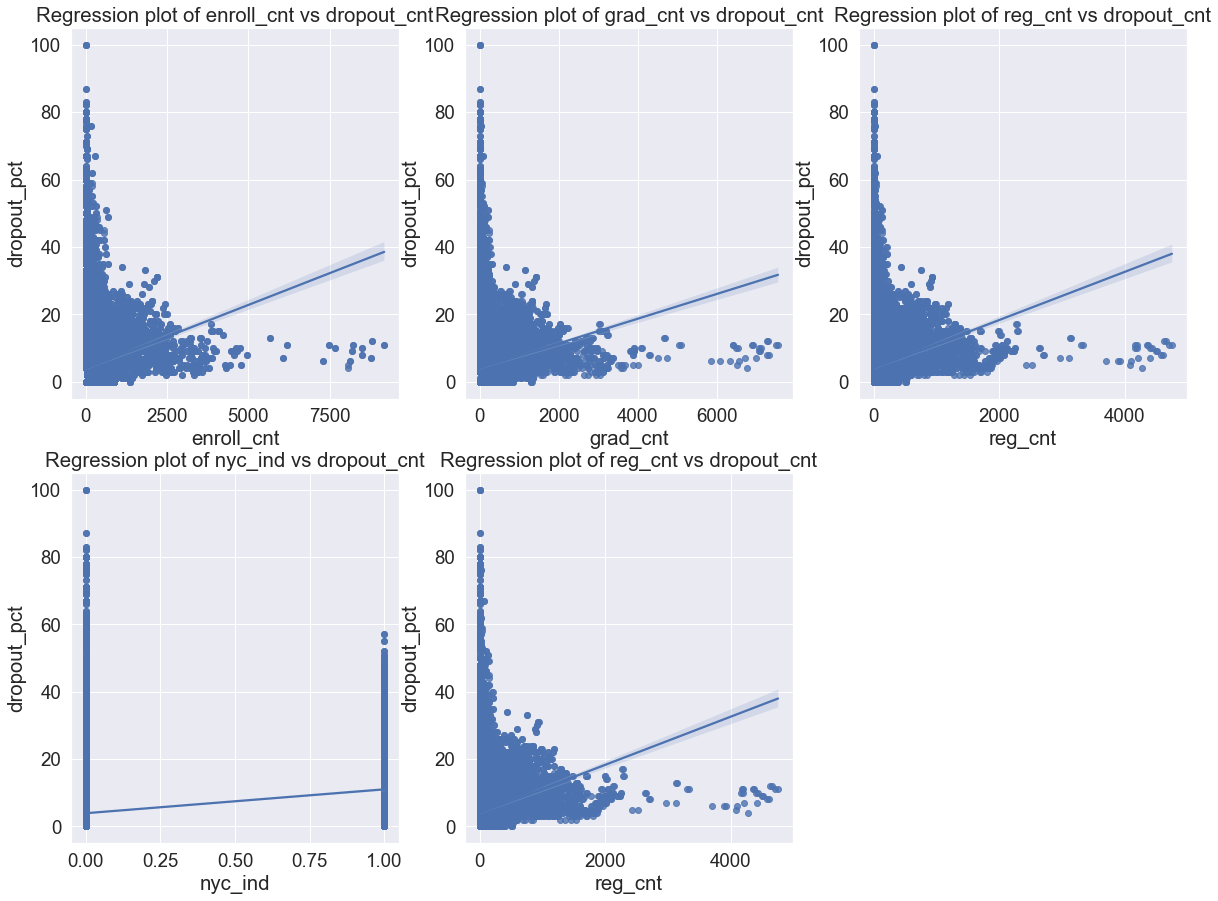

In [27]:
plt.figure(figsize=(20,15))
for i,v in enumerate(var):
    plt.subplot(math.ceil(len(var)/3),3,i+1)
    sns.regplot(x=v, y="dropout_pct",data = data).set(title=f'Regression plot of {v} vs dropout_cnt')
    #plt.tight_layout()

### Data Preparation and Dimensionality reduction:
* Now let's prepare the data and reduce the dimensions using different techniques

In [28]:
#check columns
data.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt',
       'reg_pct', 'dropout_cnt', 'dropout_pct'],
      dtype='object')


Data has count and count columns here which provides the same information. Better to get rid of the count column

This would be a good model as it would avoid leaking the information of the response variable while training and testing the data

In [29]:
#filter the columns with variables having "_pct" in it
col1 = list(data.filter(like = '_cnt', axis = 1).columns)

In [30]:
col1

['enroll_cnt', 'grad_cnt', 'reg_cnt', 'dropout_cnt']

**We believe enroll_cnt should be kept.**

In [31]:
#assign the data without col1 columns in it
df1 = data.iloc[:,~data.columns.isin(col1[1:])]

In [32]:
df1.head()

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   

   subgroup_code                  subgroup_name  enroll_cnt  grad_pct  \
0              1                   All Students         658        71   
1              2                         Female         324        76   
2              3                           Male         334        65   
3              4  American Indian/Alaska Native           0         0   
4              5                          Black         367        68   

   reg_pct  dropout_pct  
0       47           22  
1       52           20  
2       42           25  
3        0            0  
4       50           25

In [33]:
df1.shape

(73152, 16)

**We can now get rid of:**

- `report_school_year`, as the data is only for 2018-19 and is not adding any value
- `aggregation_index` and `aggregation_type`, as it has only 1 type "District"
- `aggregation_name` and `county_name`, as the same information can be captured from `county_code`
- `nrc_desc`, as we have `nrc_code`
- `subgroup_name`, as it has its information captured in `subgroup_code`
- It is wise to keep data in numeric form

In [34]:
col2 = ['report_school_year','aggregation_index','aggregation_type','aggregation_name','county_name',
       'nrc_desc', 'subgroup_name']
df2 = df1.iloc[:,~df1.columns.isin(col2)]
#check the data shape of df2
df2.shape

(73152, 9)

In [35]:
df2.head()

nrc_code  county_code  nyc_ind                     membership_desc  \
0         3            1        0  2013 Total Cohort - 6 Year Outcome   
1         3            1        0  2013 Total Cohort - 6 Year Outcome   
2         3            1        0  2013 Total Cohort - 6 Year Outcome   
3         3            1        0  2013 Total Cohort - 6 Year Outcome   
4         3            1        0  2013 Total Cohort - 6 Year Outcome   

   subgroup_code  enroll_cnt  grad_pct  reg_pct  dropout_pct  
0              1         658        71       47           22  
1              2         324        76       52           20  
2              3         334        65       42           25  
3              4           0         0        0            0  
4              5         367        68       50           25

* Applying the domain knowledge, we have the reduced the dimensions from 19 to 9 without losing anything important.
* One can use the feature selecting methods for the dimensionality reduction but in this case, applying domain knowledge is best option


* Many columns showing counts has all values 0 and makes no sense to keep those in our study. Let's assign the values with all values not zero to a new variable. This gives us new observations

In [36]:
df2.iloc[:,5:]

enroll_cnt  grad_pct  reg_pct  dropout_pct
0             658        71       47           22
1             324        76       52           20
2             334        65       42           25
3               0         0        0            0
4             367        68       50           25
...           ...       ...      ...          ...
73147           0         0        0            0
73148           0         0        0            0
73149           0         0        0            0
73150           0         0        0            0
73151           0         0        0            0

[73152 rows x 4 columns]

In [37]:
#assign the data with no all values zero to new variable and reset the index
df3 = df2.loc[(df2.iloc[:,5:].T!=0).any()]
df3 = df3.reset_index(drop=True)
df3

nrc_code  county_code  nyc_ind  \
0             3            1        0   
1             3            1        0   
2             3            1        0   
3             3            1        0   
4             3            1        0   
...         ...          ...      ...   
39669         4           68        0   
39670         4           68        0   
39671         4           68        0   
39672         4           68        0   
39673         4           68        0   

                                        membership_desc  subgroup_code  \
0                    2013 Total Cohort - 6 Year Outcome              1   
1                    2013 Total Cohort - 6 Year Outcome              2   
2                    2013 Total Cohort - 6 Year Outcome              3   
3                    2013 Total Cohort - 6 Year Outcome              5   
4                    2013 Total Cohort - 6 Year Outcome              6   
...                                                 ...            ...   
39669  2013 Total Cohort - 6 Year Outcome - August 2019              3   
39670  2013 Total Cohort - 6 Year Outcome - August 2019             10   
39671  2013 Total Cohort - 6 Year Outcome - August 2019             11   
39672  2013 Total Cohort - 6 Year Outcome - August 2019             15   
39673  2013 Total Cohort - 6 Year Outcome - August 2019             16   

       enroll_cnt  grad_pct  reg_pct  dropout_pct  
0             658        71       47           22  
1             324        76       52           20  
2             334        65       42           25  
3             367        68       50           25  
4              98        59       41           29  
...           ...       ...      ...          ...  
39669          36        69       56           25  
39670          48        90       67           10  
39671          13        15       15           46  
39672          33        70       61           21  
39673          28        79       50           14  

[39674 rows x 9 columns]

* Data consists of column `membership_desc` which provides in which year the student was enrolled in. It also provides the information of how many years the students is enrolled in

* We can take the total years enrolled in high school information by splitting the string and adding a new column

* After that we can get rid of the `membership_desc` column

In [38]:
df3['membership_desc'].head(10)

0    2013 Total Cohort - 6 Year Outcome
1    2013 Total Cohort - 6 Year Outcome
2    2013 Total Cohort - 6 Year Outcome
3    2013 Total Cohort - 6 Year Outcome
4    2013 Total Cohort - 6 Year Outcome
5    2013 Total Cohort - 6 Year Outcome
6    2013 Total Cohort - 6 Year Outcome
7    2013 Total Cohort - 6 Year Outcome
8    2013 Total Cohort - 6 Year Outcome
9    2013 Total Cohort - 6 Year Outcome
Name: membership_desc, dtype: object

In [39]:
#retrieve the total years from the membership_desc column and append it into new list
total_years=[]
for i in range(len(df3)):
    total_years.append(int(df3['membership_desc'][i].split(" ")[4]))

#total_years

In [40]:
#insert the with total years to index 3
df3.insert(3,"total_years",total_years)

In [41]:
#drop the column membership_desc and assign the data to df
df = df3.drop(['membership_desc'],axis = 1)
df

nrc_code  county_code  nyc_ind  total_years  subgroup_code  enroll_cnt  \
0             3            1        0            6              1         658   
1             3            1        0            6              2         324   
2             3            1        0            6              3         334   
3             3            1        0            6              5         367   
4             3            1        0            6              6          98   
...         ...          ...      ...          ...            ...         ...   
39669         4           68        0            6              3          36   
39670         4           68        0            6             10          48   
39671         4           68        0            6             11          13   
39672         4           68        0            6             15          33   
39673         4           68        0            6             16          28   

       grad_pct  reg_pct  dropout_pct  
0            71       47           22  
1            76       52           20  
2            65       42           25  
3            68       50           25  
4            59       41           29  
...         ...      ...          ...  
39669        69       56           25  
39670        90       67           10  
39671        15       15           46  
39672        70       61           21  
39673        79       50           14  

[39674 rows x 9 columns]

In [42]:
#check the unique values in the column `total_years`
df.total_years.unique()

array([6, 5, 4])

## Feature Engineering
### To add reg_pct_level:

* 0 (Low): <= 0.5 * Median of `dropout_pct`  
* 1 (Med): > 0.5 * Median of `dropout_pct` and <= 1.5 * Median of `dropout_pct`  
* 2 (High): > 1.5 * Median of `dropout_pct`  

In [43]:
df["dropout_pct"].median()

5.0

In [44]:
df["dropout_pct_level"] = df["dropout_pct"].apply(
    lambda x: 0
    if x <= 0.5 * df["dropout_pct"].median()
    else 1
    if x <= 1.5 * df["dropout_pct"].median()
    else 2
    #if x > 1.5 * df["reg_pct"].median()
    #else 3
)

In [45]:
df = df.drop(columns=['dropout_pct'])
df

nrc_code  county_code  nyc_ind  total_years  subgroup_code  enroll_cnt  \
0             3            1        0            6              1         658   
1             3            1        0            6              2         324   
2             3            1        0            6              3         334   
3             3            1        0            6              5         367   
4             3            1        0            6              6          98   
...         ...          ...      ...          ...            ...         ...   
39669         4           68        0            6              3          36   
39670         4           68        0            6             10          48   
39671         4           68        0            6             11          13   
39672         4           68        0            6             15          33   
39673         4           68        0            6             16          28   

       grad_pct  reg_pct  dropout_pct_level  
0            71       47                  2  
1            76       52                  2  
2            65       42                  2  
3            68       50                  2  
4            59       41                  2  
...         ...      ...                ...  
39669        69       56                  2  
39670        90       67                  2  
39671        15       15                  2  
39672        70       61                  2  
39673        79       50                  2  

[39674 rows x 9 columns]

**Get a copy of our data**

In [46]:
df_final = df.copy()

<AxesSubplot:xlabel='dropout_pct_level', ylabel='count'>

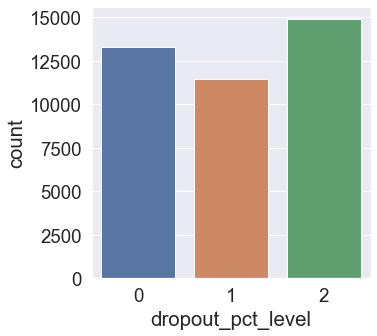

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(x='dropout_pct_level',data=df)

<AxesSubplot:>

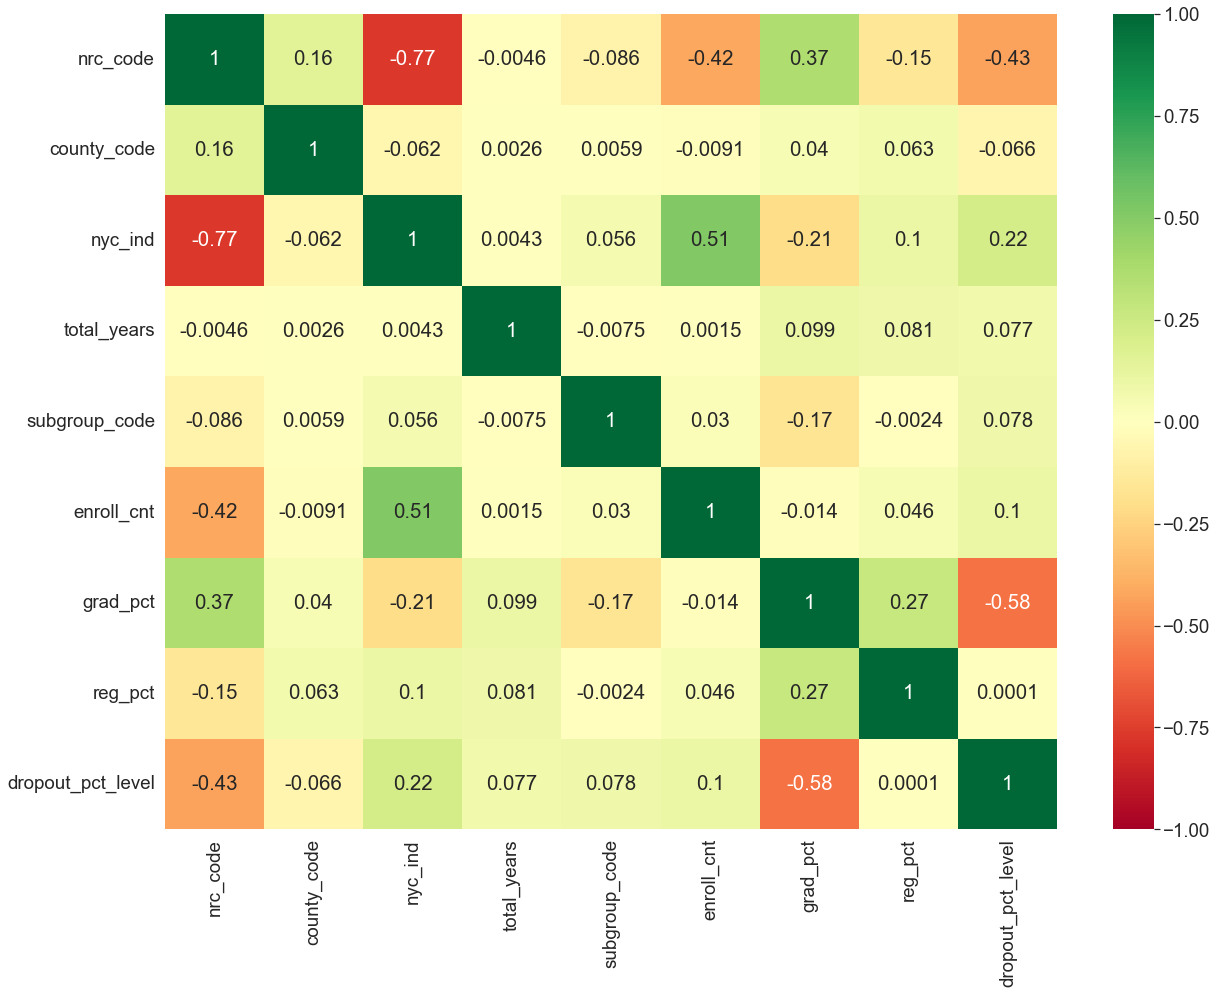

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(df_final.corr(),cmap='RdYlGn',vmin = -1, vmax = 1,annot=True)

## Split the data

* When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* This is done by setting the stratify parameter to target variable in the train_test_split function.

In [49]:
#split the data into X and y
X = df_final.drop('dropout_pct_level',axis=1)
y = df_final['dropout_pct_level']

seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=seed, stratify=y)

**We will use the same functions, created in previous assignments, to calculate different metrics and plot the confusion matrix.**

## Function to create confusion matrix

In [50]:
#Create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.
def model_performance_classification_sklearn(model, predictors, target):
    
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred,average='macro')  
    precision = precision_score(target, pred,average='macro')  
    f1 = f1_score(target, pred,average='macro') 

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [51]:
def confusion_matrix_sklearn(model, predictors, target):
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(3, 3)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building the model

- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.

### Decision Tree

In [52]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=seed)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Check the confusion matrix on the training set.**

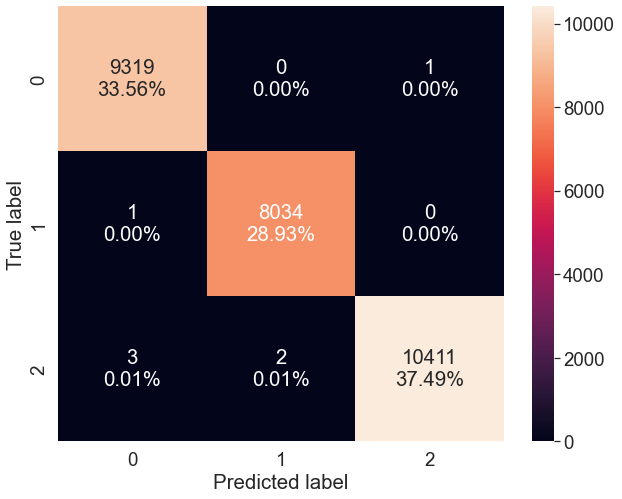

In [53]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [54]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999748  0.999763   0.999742  0.999752


**Check the confusion matrix on the testing set.**

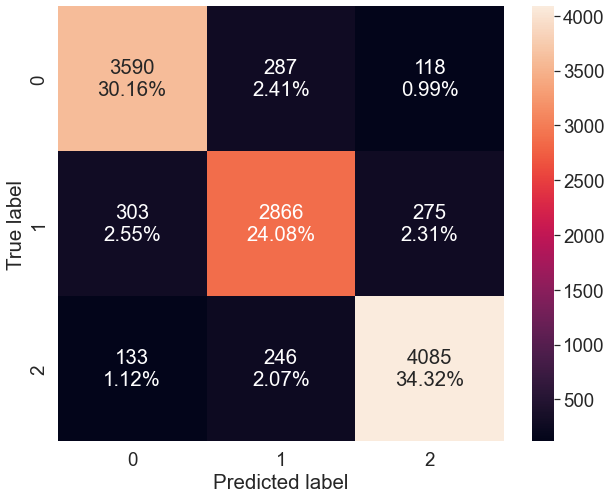

In [55]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [56]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.885575  0.881965   0.882377  0.882153


**Observations:**
- Almost 100% accuracy on training data, but only 88.6% accuracy on testing set, which model is overfitting.

#### Visualizing the Decision Tree

In [57]:
feature_names = list(X.columns)
print(feature_names)

['nrc_code', 'county_code', 'nyc_ind', 'total_years', 'subgroup_code', 'enroll_cnt', 'grad_pct', 'reg_pct']


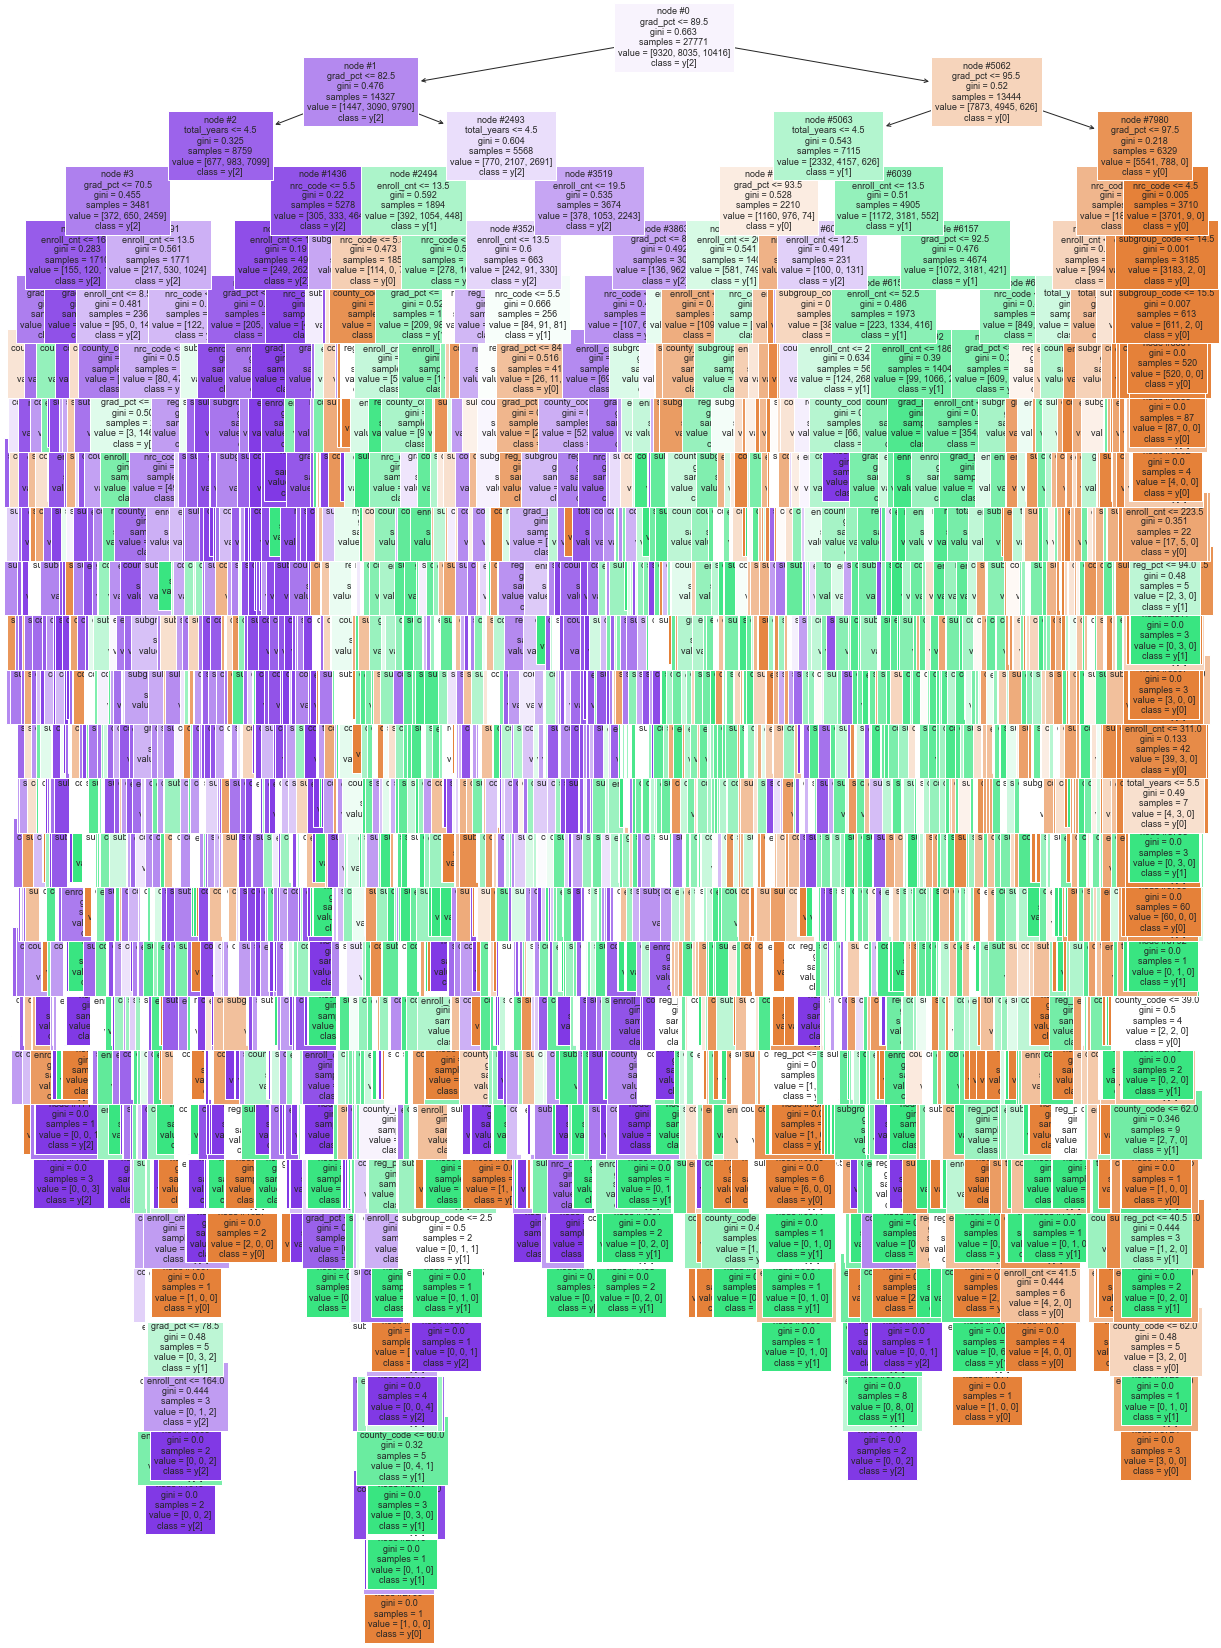

In [58]:
plt.figure(figsize=(20,30))
tree.plot_tree(dtree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [59]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree,feature_names=feature_names,show_weights=True))

|--- grad_pct <= 89.50
|   |--- grad_pct <= 82.50
|   |   |--- total_years <= 4.50
|   |   |   |--- grad_pct <= 70.50
|   |   |   |   |--- enroll_cnt <= 16.50
|   |   |   |   |   |--- grad_pct <= 14.50
|   |   |   |   |   |   |--- county_code <= 14.00
|   |   |   |   |   |   |   |--- nrc_code <= 5.50
|   |   |   |   |   |   |   |   |--- subgroup_code <= 2.50
|   |   |   |   |   |   |   |   |   |--- county_code <= 9.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |   |   |   |   |   |   |   |--- county_code >  9.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- subgroup_code >  2.50
|   |   |   |   |   |   |   |   |   |--- weights: [9.00, 0.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- nrc_code >  5.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |   |   |   |   |--- county_code >  14.00
|   |   |   |   |   |   |   |--- county_co

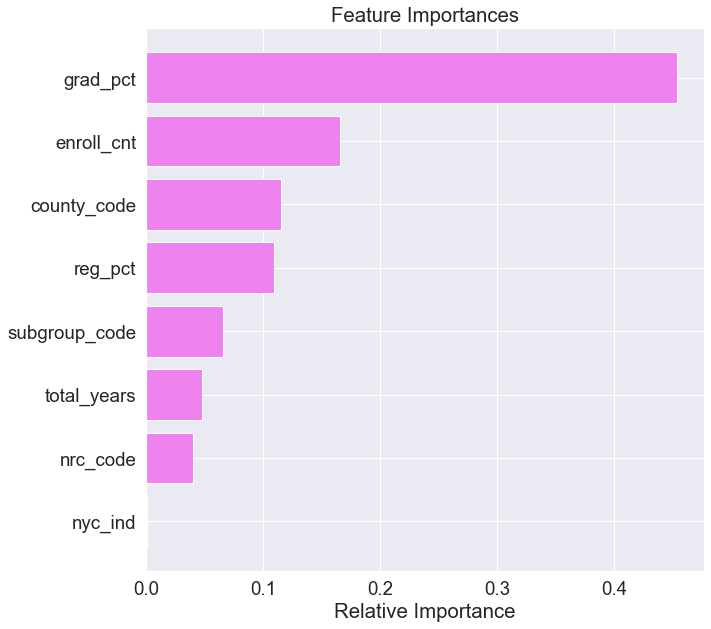

In [60]:
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**The tree above is very complex, such a tree often overfits.**

#### Reducing over fitting

- In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data and this is one of the root causes of overfitting
- Let's try Limiting the max_depth of tree to 3

In [61]:
dtree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=seed)
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**Check the confusion matrix on the training set.**

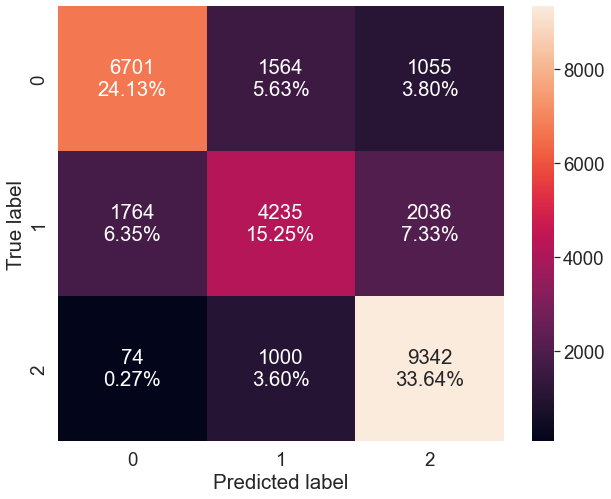

In [62]:
confusion_matrix_sklearn(dtree1, X_train, y_train)

In [63]:
dtree_tune_model_train_perf=model_performance_classification_sklearn(dtree1, X_train, y_train)
print("Training performance \n",dtree_tune_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.730186  0.714317   0.719675  0.713045


**Check the confusion matrix on the training set.**

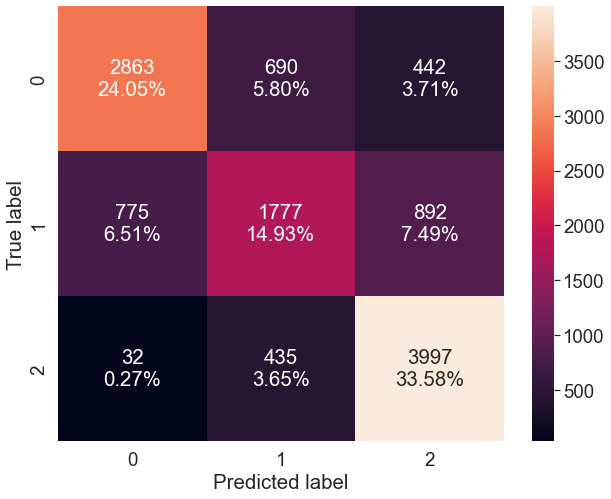

In [64]:
confusion_matrix_sklearn(dtree1, X_test, y_test)

In [65]:
dtree_tune_model_test_perf=model_performance_classification_sklearn(dtree1, X_test, y_test)
print("Testing performance \n",dtree_tune_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.725615  0.709334    0.71407  0.707733


**Observations:**
- Accuracy on training set has reduced from 99% to 73% but this is an improvement because now the model is not overfitting and we have a generalized model.

#### Visualizing the tuned Decision Tree

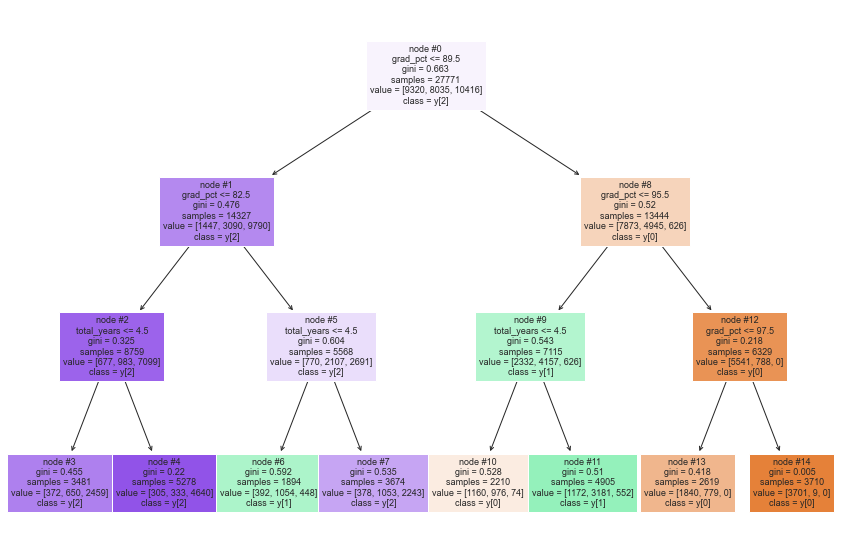

In [66]:
plt.figure(figsize=(15,10))

tree.plot_tree(dtree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [67]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree1,feature_names=feature_names,show_weights=True))

|--- grad_pct <= 89.50
|   |--- grad_pct <= 82.50
|   |   |--- total_years <= 4.50
|   |   |   |--- weights: [372.00, 650.00, 2459.00] class: 2
|   |   |--- total_years >  4.50
|   |   |   |--- weights: [305.00, 333.00, 4640.00] class: 2
|   |--- grad_pct >  82.50
|   |   |--- total_years <= 4.50
|   |   |   |--- weights: [392.00, 1054.00, 448.00] class: 1
|   |   |--- total_years >  4.50
|   |   |   |--- weights: [378.00, 1053.00, 2243.00] class: 2
|--- grad_pct >  89.50
|   |--- grad_pct <= 95.50
|   |   |--- total_years <= 4.50
|   |   |   |--- weights: [1160.00, 976.00, 74.00] class: 0
|   |   |--- total_years >  4.50
|   |   |   |--- weights: [1172.00, 3181.00, 552.00] class: 1
|   |--- grad_pct >  95.50
|   |   |--- grad_pct <= 97.50
|   |   |   |--- weights: [1840.00, 779.00, 0.00] class: 0
|   |   |--- grad_pct >  97.50
|   |   |   |--- weights: [3701.00, 9.00, 0.00] class: 0



**The tree has become readable now but the accuracy on test set has not improved, even lower.**

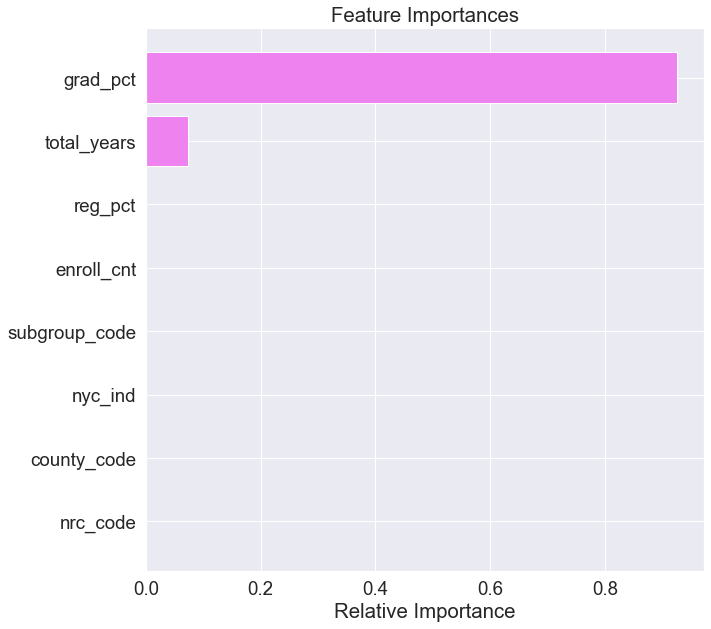

In [68]:
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [69]:
print (pd.DataFrame(dtree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                    Imp
grad_pct       0.925894
total_years    0.074106
nrc_code       0.000000
county_code    0.000000
nyc_ind        0.000000
subgroup_code  0.000000
enroll_cnt     0.000000
reg_pct        0.000000


**Observations:**
- We can see in important features of previous model, `enroll_cnt` was on top, but here importance of `enroll_cnt` variable is zero.

- Maybe setting max_depth to 3 is not good enough

- It is bad to have a very low depth because our model will underfit

- Let's see how to find the best values

#### Pre-Tuning Using GridSearch for Hyperparameter tuning of our tree model

- Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
- Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
- It is an exhaustive search that is performed on a the specific parameter values of a model.
- The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**What is `Pre-Tuning?`**
- Pre-tuning involves setting hyperparameters such as the maximum depth of the tree, minimum number of samples required to split an internal node, minimum number of samples required to be at a leaf node, and maximum number of leaf nodes. These hyperparameters control the complexity of the tree and help to prevent overfitting. By setting appropriate values for these hyperparameters before fitting the model to the data, you can avoid the risk of overfitting the model.

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=seed)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=42)

**Confusion Matrix - decision tree with tuned hyperparameters**

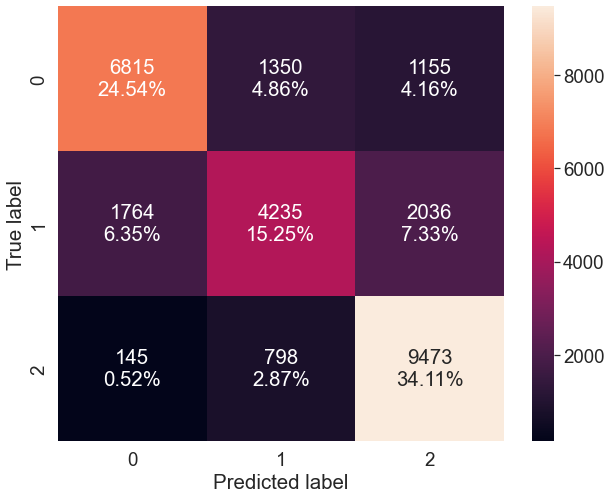

In [72]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [73]:
dtree_gridtune_model_training_perf=model_performance_classification_sklearn(estimator, X_train, y_train)
print("Traing performance \n",dtree_gridtune_model_training_perf)

Traing performance 
    Accuracy    Recall  Precision       F1
0  0.739008  0.722586   0.730895  0.72124


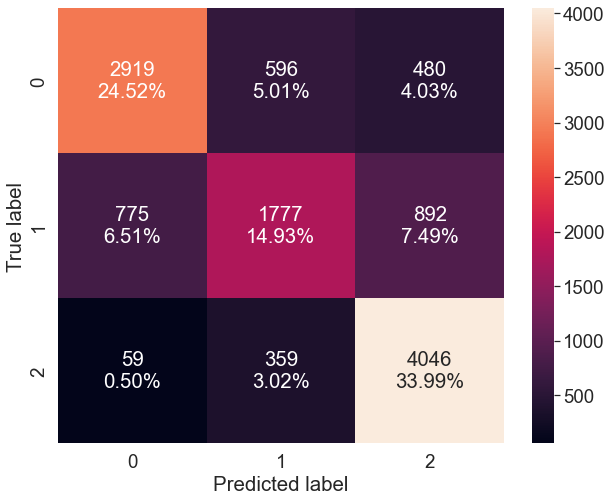

In [74]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [75]:
dtree_gridtune_model_test_perf=model_performance_classification_sklearn(estimator, X_test, y_test)
print("Testing performance \n",dtree_gridtune_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734437  0.717665   0.724996  0.715934


**Observations:**
- After tuning hyperparameters, the performance of the model has become more generalised.
- Accuracy has imporved both in training and testing data.

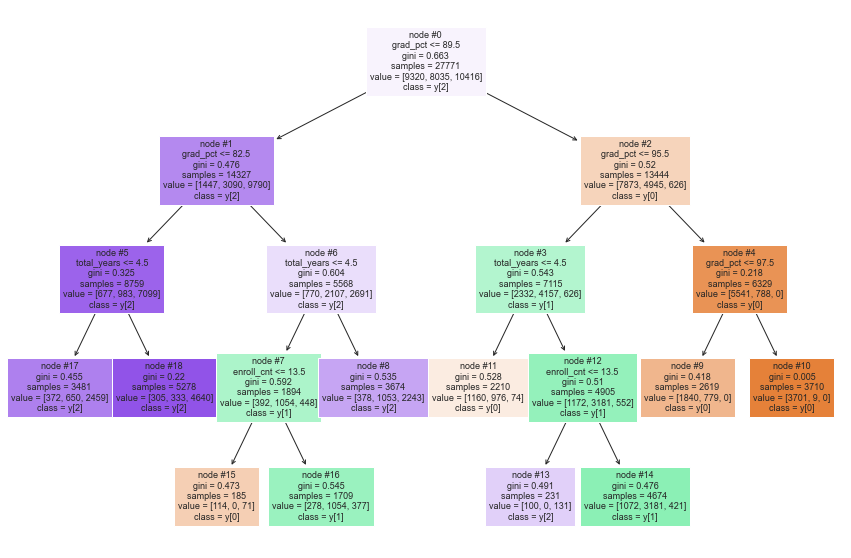

In [76]:
# Visualizing the tree
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [77]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- grad_pct <= 89.50
|   |--- grad_pct <= 82.50
|   |   |--- total_years <= 4.50
|   |   |   |--- weights: [372.00, 650.00, 2459.00] class: 2
|   |   |--- total_years >  4.50
|   |   |   |--- weights: [305.00, 333.00, 4640.00] class: 2
|   |--- grad_pct >  82.50
|   |   |--- total_years <= 4.50
|   |   |   |--- enroll_cnt <= 13.50
|   |   |   |   |--- weights: [114.00, 0.00, 71.00] class: 0
|   |   |   |--- enroll_cnt >  13.50
|   |   |   |   |--- weights: [278.00, 1054.00, 377.00] class: 1
|   |   |--- total_years >  4.50
|   |   |   |--- weights: [378.00, 1053.00, 2243.00] class: 2
|--- grad_pct >  89.50
|   |--- grad_pct <= 95.50
|   |   |--- total_years <= 4.50
|   |   |   |--- weights: [1160.00, 976.00, 74.00] class: 0
|   |   |--- total_years >  4.50
|   |   |   |--- enroll_cnt <= 13.50
|   |   |   |   |--- weights: [100.00, 0.00, 131.00] class: 2
|   |   |   |--- enroll_cnt >  13.50
|   |   |   |   |--- weights: [1072.00, 3181.00, 421.00] class: 1
|   |--- grad_pct >  95.50
| 

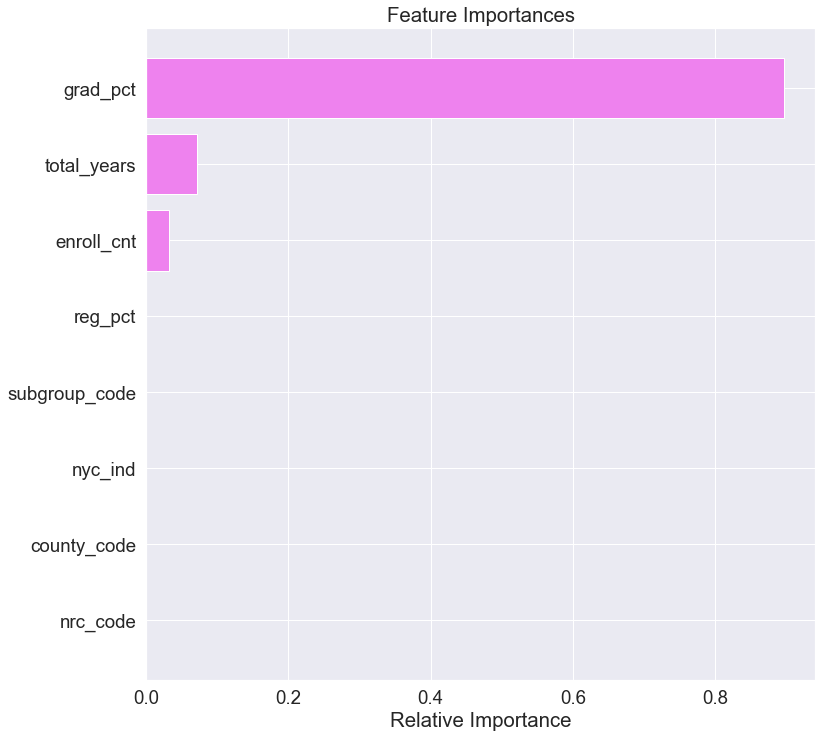

In [78]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
* You can see in important features of previous model, `enroll_cnt` was lost, but here importance of `enroll_cnt` variable is back

* This shows that hyperparameter tuning using Grid Search is better than randomly limiting a Hyperparameter

* But post pruning might give even better results, since there is quite a good possibility that we might neglect some hyperparameters, post pruning will take care of all that.

**What is `Post-tuning`?**
* Post-tuning involves making adjustments to the tree structure after it has been fit to the data. This can be done by pruning the tree, which involves removing nodes that do not contribute much to the predictive power of the model. This can be done using methods such as cost complexity pruning, which involves minimizing a cost function that balances the complexity of the tree and its accuracy on the training data. By pruning the tree, you can reduce its complexity and improve its generalization performance on new data.

**Cost Complexity Pruning**

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``.

`ccp_alpha` represents the complexity parameter used to control the amount of pruning applied to the decision tree. The higher the value of `ccp_alpha`, the more aggressively the algorithm prunes the tree, resulting in a smaller tree with less complexity. Conversely, a lower value of `ccp_alpha` will result in less aggressive pruning and a larger, more complex tree.

Choosing an appropriate value for `ccp_alpha` involves balancing the trade-off between model complexity and accuracy. A larger `ccp_alpha` will result in a simpler model but may sacrifice some accuracy, while a smaller `ccp_alpha` may result in a more complex model with better accuracy, but potentially with overfitting. It is common practice to tune the `ccp_alpha` value using `cross-validation` to find the optimal value that balances these competing factors.

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

**https://online.stat.psu.edu/stat508/lesson/11/11.8/11.8.2**

### Random Forest

In [79]:
rf_estimator=RandomForestClassifier(random_state=seed)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

**Confusion Matrix - Random Forest on training data.**

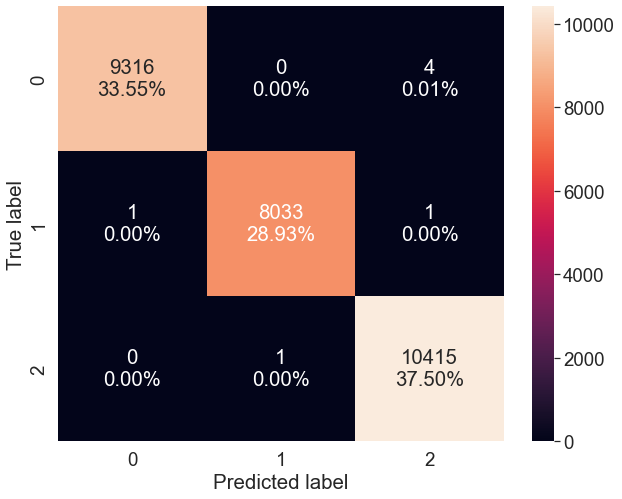

In [80]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [81]:
rf_model_training_perf=model_performance_classification_sklearn(rf_estimator, X_train, y_train)
print("Traing performance \n",rf_model_training_perf)

Traing performance 
    Accuracy    Recall  Precision        F1
0  0.999748  0.999742   0.999763  0.999752


**Confusion Matrix - Random Forest on testing data.**

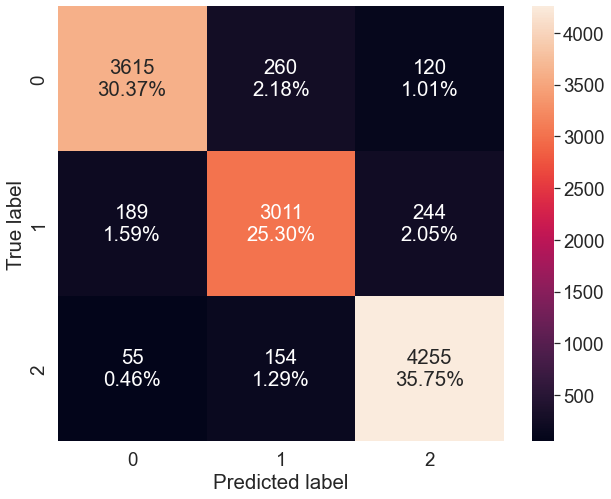

In [82]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [83]:
rf_model_testing_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Traing performance \n",rf_model_testing_perf)

Traing performance 
    Accuracy    Recall  Precision        F1
0  0.914139  0.910779   0.912363  0.911386


**With default parameters:**

- Random forest classifier is overfitting the train data.
- **But how small is the gap between the accuracy of training data and the accuracy of testing data so we can consider that the model is not overfitting?**

**Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [84]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=seed)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=150, random_state=42)

**Check the matrix of tuned rf on training data.**

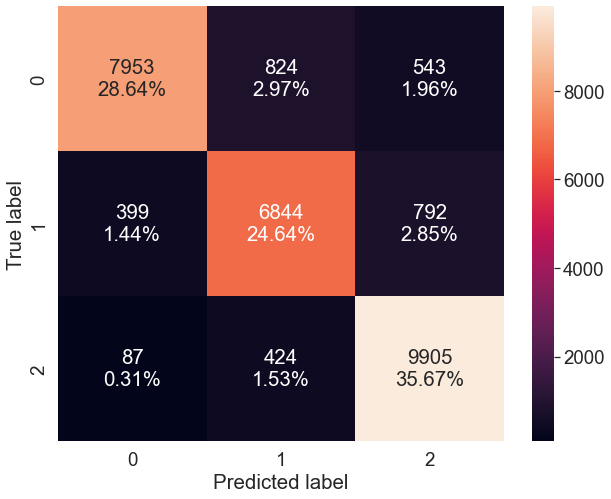

In [85]:
confusion_matrix_sklearn(rf_estimator_tuned, X_train, y_train)

In [86]:
rf_tuned_training_perf=model_performance_classification_sklearn(rf_estimator_tuned, X_train, y_train)
print("Traing performance \n",rf_tuned_training_perf)

Traing performance 
    Accuracy    Recall  Precision        F1
0  0.889489  0.885347   0.889804  0.886393


**Check on the testing data.**

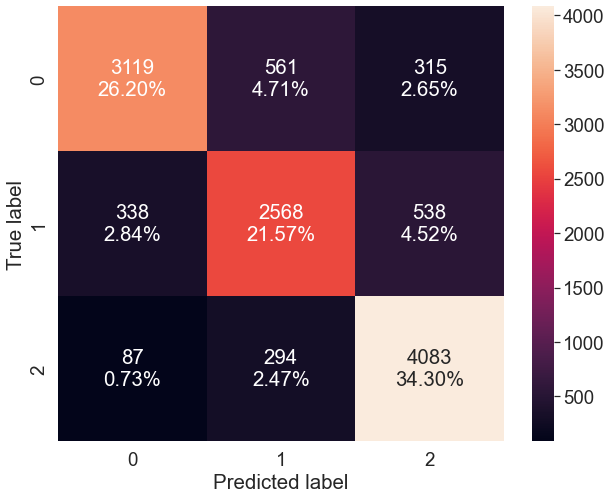

In [87]:
confusion_matrix_sklearn(rf_estimator_tuned, X_test, y_test)

In [88]:
rf_tuned_testing_perf=model_performance_classification_sklearn(rf_estimator_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_testing_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.820801  0.813674   0.819162  0.814693


**Observations:**
- We can see that all of the accuracy, recall, precision and f1 score decrease after we tuned the hyper-parameters of the random forest.
- However, the gap between the training data and testing data decreases as well, indicating that the model is more generalizable than the previous one.

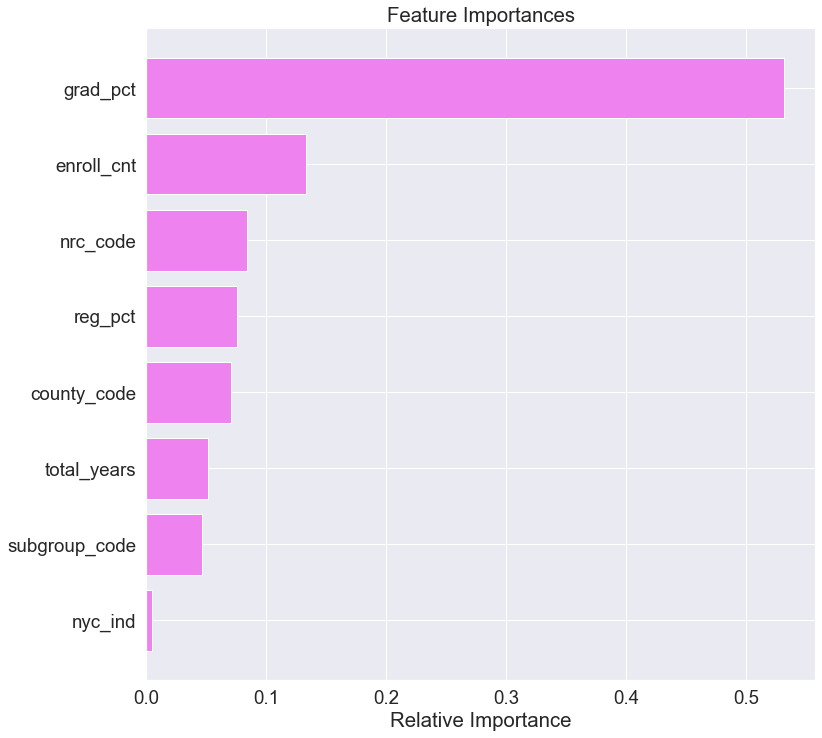

In [89]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- Comparing to the feature importance in the decision tree, we notice that some features (i.e., reg_pct, total_years, subgroup_code) get more critical.

### Gradient Boosting Classifier

In [90]:
gbc = GradientBoostingClassifier(random_state=seed)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

**Check the matrix on training data.**

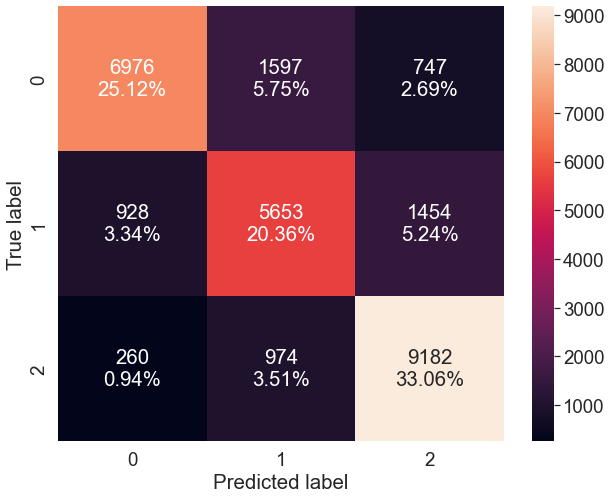

In [91]:
confusion_matrix_sklearn(gbc, X_train, y_train)

In [92]:
gbc_training_perf=model_performance_classification_sklearn(gbc, X_train, y_train)
print("Training performance \n",gbc_training_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.785388  0.777858   0.782834  0.778593


**Check on the testing data.**

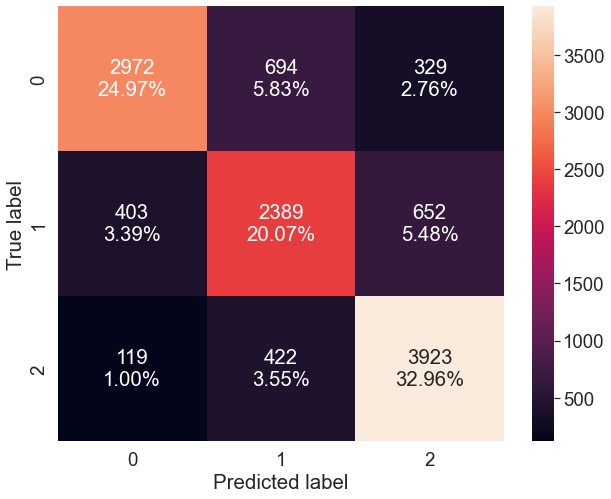

In [93]:
confusion_matrix_sklearn(gbc, X_test, y_test)

In [94]:
gbc_testing_perf=model_performance_classification_sklearn(gbc, X_test, y_test)
print("Testing performance \n",gbc_testing_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.779971  0.772136   0.777386  0.772937


**Observations:**
- We think the model is not overfitting on the training data, because the gap between the training matrix and testing matrix is not big.
- But let's tune the hyper parameter to find if we can get a better performance model.

In [95]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=seed)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.8, n_estimators=250, random_state=42,
                           subsample=0.9)

**Check the tuned model matrix on training data.**

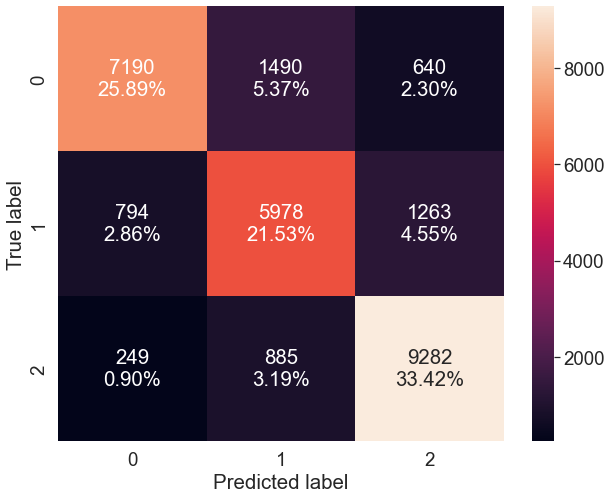

In [96]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [97]:
gbc_tuned_training_perf=model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
print("Training performance \n",gbc_tuned_training_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.808397  0.802194   0.806282  0.802732


**Check the tuned model matrix on testing data.**

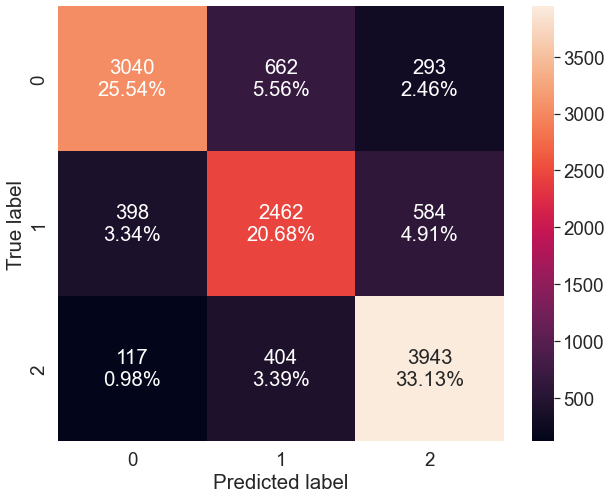

In [98]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [99]:
gbc_tuned_testing_perf=model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Training performance \n",gbc_tuned_testing_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.793497  0.786369   0.790343  0.78699


**Observations:**
- After we tuned the hyper-parameters, the accuracy on training data improved from 78.5% to 80.1%, accuracy on testing data improved from 77.8% to 79.3%.
- The new model doesn't overfitting on training data.

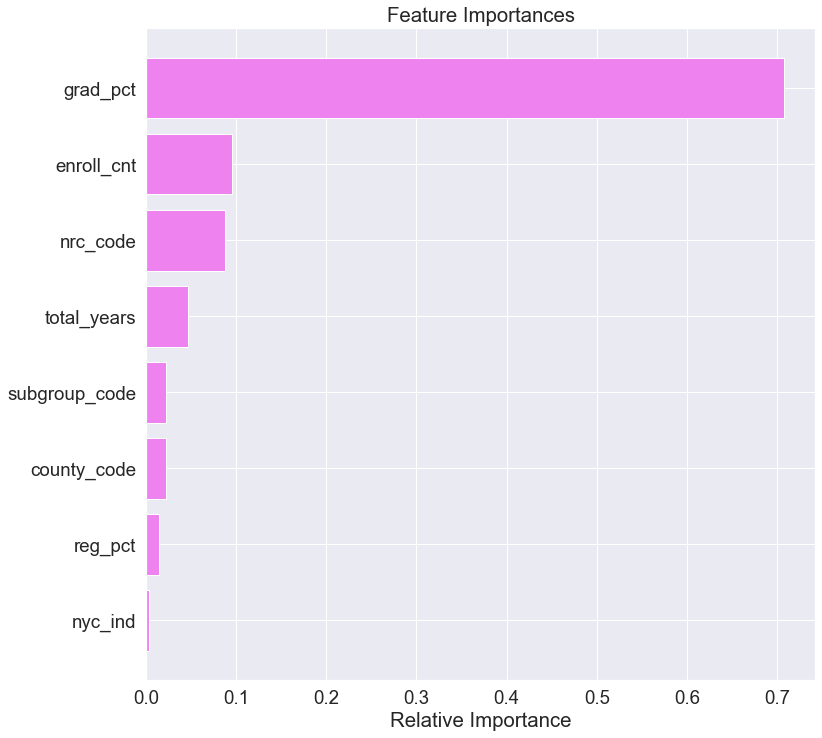

In [100]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier

In [101]:
xgb = XGBClassifier(random_state=seed,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

**Check the XGB model matrix on training data.**

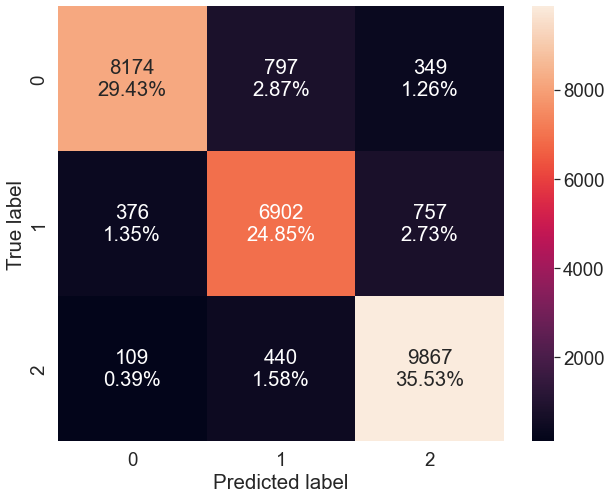

In [102]:
confusion_matrix_sklearn(xgb, X_train, y_train)

In [103]:
xgb_training_perf=model_performance_classification_sklearn(xgb, X_train, y_train)
print("Training performance \n",xgb_training_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.898167  0.894441   0.897071  0.895125


**Check the XGB model matrix on testing data.**

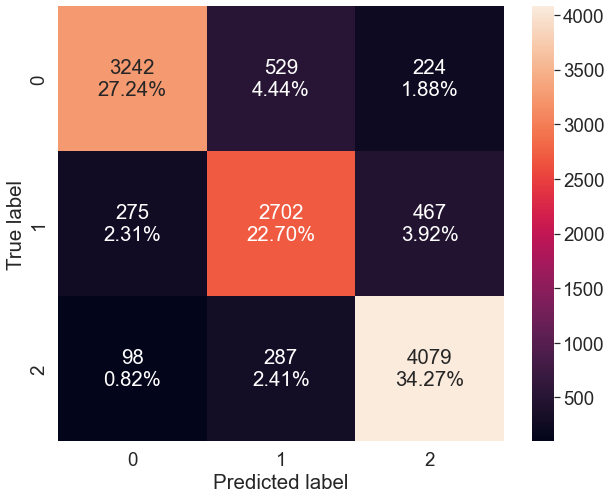

In [104]:
confusion_matrix_sklearn(xgb, X_test, y_test)

In [105]:
xgb_testing_perf=model_performance_classification_sklearn(xgb, X_test, y_test)
print("Testing performance \n",xgb_testing_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.842057  0.836607   0.840002  0.837242


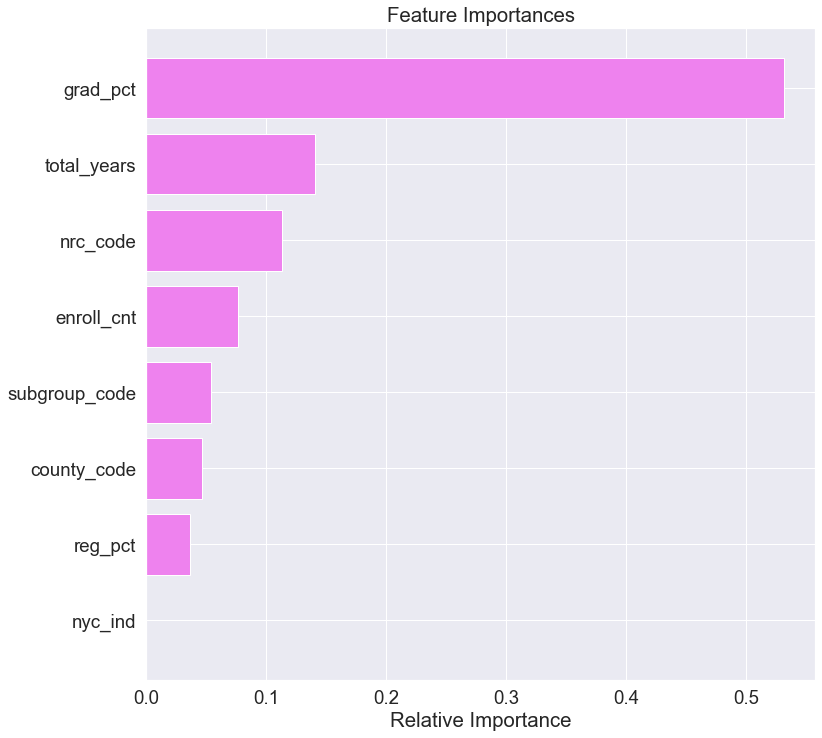

In [106]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Oberservations:**
- The XGB model performance is pretty good, and not overfitting on the training data.
- Let's tune the hyper-parameters and see if we can improve our XGB model a little bit more.

**XGBoost has many hyper parameters which can be tuned to increase the model performance. We check the XGB's document and some of the important parameters are:**
https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [107]:
# Choose the type of classifier. 
#xgb_tuned = XGBClassifier(random_state=seed,eval_metric='logloss')

# Grid of parameters to choose from
## add from
#parameters = {
#    "n_estimators": np.arange(10,100,20),
#    "subsample":[0.5,0.7,0.9,1],
#    "learning_rate":[0.01,0.1,0.2,0.05],
#    "gamma":[0,1,3],
#    "colsample_bytree":[0.5,0.7,0.9,1],
#    "colsample_bylevel":[0.5,0.7,0.9,1]
#}

# Type of scoring used to compare parameter combinations
#acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
#grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
#grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
#xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
#xgb_tuned.fit(X_train, y_train)

### Stochastic gradient descent

In [108]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
sgd_classifier = SGDClassifier(loss='log', learning_rate='constant', eta0=0.005, max_iter=10000, tol=1e-3)
sgd_classifier.fit(X_train, y_train)

SGDClassifier(eta0=0.005, learning_rate='constant', loss='log', max_iter=10000)

**Check matrix on the training data.**

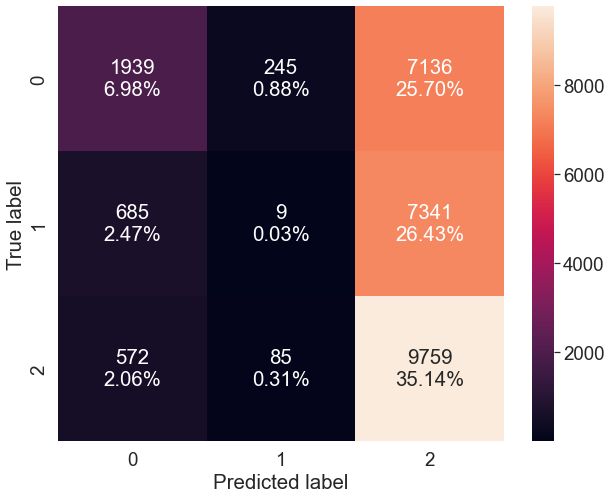

In [109]:
confusion_matrix_sklearn(sgd_classifier, X_train, y_train)

In [110]:
sgd_training_perf=model_performance_classification_sklearn(sgd_classifier, X_train, y_train)
print("Training performance \n",sgd_training_perf)

Training performance 
    Accuracy   Recall  Precision       F1
0  0.421555  0.38203   0.345303  0.29175


**Check on testing data**

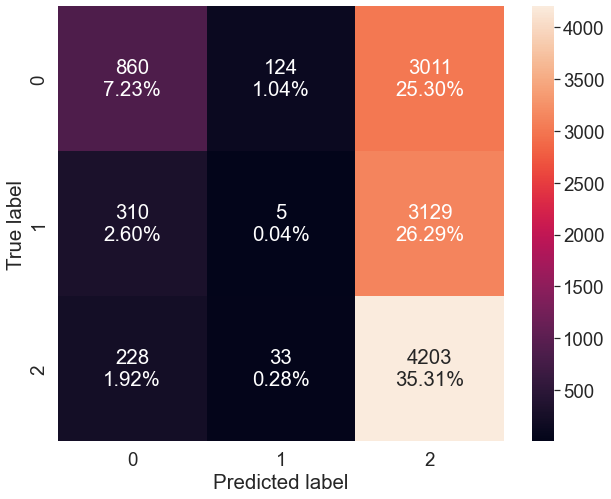

In [111]:
confusion_matrix_sklearn(sgd_classifier, X_test, y_test)

In [112]:
sgd_testing_perf=model_performance_classification_sklearn(sgd_classifier, X_test, y_test)
print("Testing performance \n",sgd_testing_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.425775  0.386084   0.350797  0.29647


**Observations:**
- No overfitting on training data at all, but poor performance.
- The reason might be we didn't normalize our data, and SGD is a distance sensitive algorithm, so let's normalize the data, and see if there will be any improvement on our data performance.

#### Normalize the data.

In [127]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#split the data into X and y
X2 = df_final.drop('dropout_pct_level',axis=1)
y2 = df_final['dropout_pct_level']
min_max_scaler_x = MinMaxScaler()
x_normalized = min_max_scaler_x.fit_transform(X2)


# Standardize x and y
standard_scaler_x = StandardScaler()
X2 = standard_scaler_x.fit_transform(X2)


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=seed)

In [135]:
sgd_classifier_nor_ = SGDClassifier(loss='log', learning_rate='constant', eta0=0.005, max_iter=10000, tol=1e-3)
sgd_classifier_nor_.fit(X_train2, y_train2)

SGDClassifier(eta0=0.005, learning_rate='constant', loss='log', max_iter=10000)

**Check the performance on normalized data.**

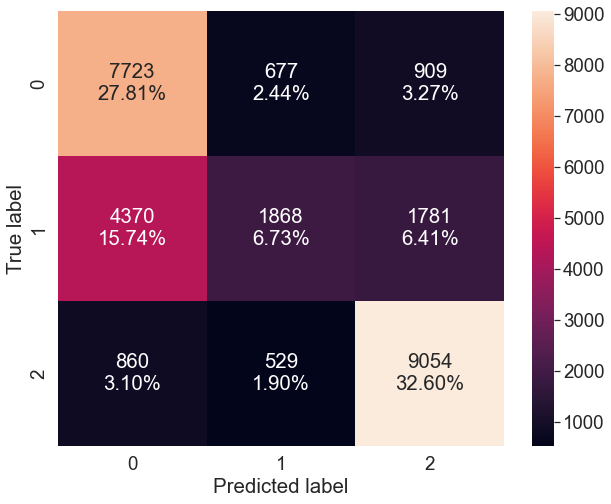

In [139]:
confusion_matrix_sklearn(sgd_classifier_nor_, X_train2, y_train2)

In [140]:
sgd_training_nor_perf=model_performance_classification_sklearn(sgd_classifier_nor_, X_train2, y_train2)
print("Training performance \n",sgd_training_nor_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.671384  0.643189   0.658286  0.61559


**Check on the testing data.**

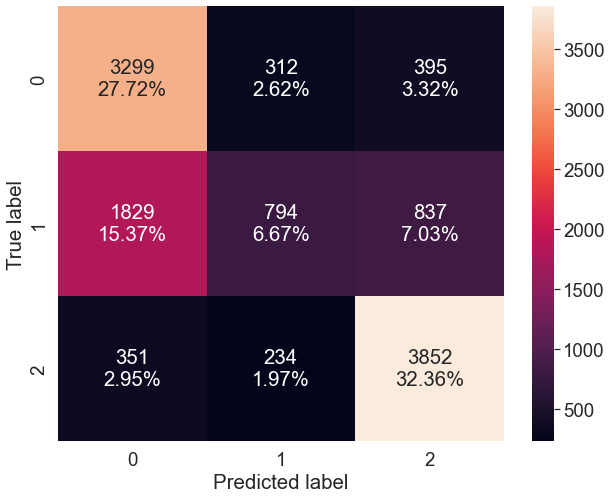

In [141]:
confusion_matrix_sklearn(sgd_classifier_nor_, X_test2, y_test2)

In [142]:
sgd_testing_nor_perf=model_performance_classification_sklearn(sgd_classifier_nor_, X_test2, y_test2)
print("Testing performance \n",sgd_testing_nor_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.667479  0.640383   0.650775  0.611872


In [145]:
get_metrics_score(sgd_classifier_nor_,False)

[0.33855460732418713,
 0.3428547425018903,
 0.33855460732418713,
 0.3428547425018903,
 0.3952364623425933,
 0.4437697575209868]

**Observations:**
- The performance of the model has improved significantly.
- And the model does not exhibit overfitting on the training dataset.

## Comparing all models

In [148]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train, average='weighted')
    test_recall = metrics.recall_score(y_test,pred_test, average='weighted')
    
    train_precision = metrics.precision_score(y_train,pred_train, average='weighted')
    test_precision = metrics.precision_score(y_test,pred_test, average='weighted')
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train, average='weighted'))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test, average='weighted'))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train, average='weighted'))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test, average='weighted'))
    
    return score_list # returning the list with train and test scores


In [158]:
def get_metrics_score2(model,flag=True):
    '''
    model : classifier to predict values of X
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train2)
    pred_test = model.predict(X_test2)
    
    train_acc = model.score(X_train,y_train2)
    test_acc = model.score(X_test,y_test2)
    
    train_recall = metrics.recall_score(y_train2,pred_train, average='weighted')
    test_recall = metrics.recall_score(y_test2,pred_test, average='weighted')
    
    train_precision = metrics.precision_score(y_train2,pred_train, average='weighted')
    test_precision = metrics.precision_score(y_test2,pred_test, average='weighted')
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train, average='weighted'))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test, average='weighted'))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train, average='weighted'))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test, average='weighted'))
    
    return score_list # returning the list with train and test scores

In [161]:
models = [sgd_classifier_nor_]


acc_train2 = []
acc_test2 = []
recall_train2 = []
recall_test2 = []
precision_train2 = []
precision_test2 = []
f1_train2 = []
f1_test2 = []

for model in models:
    j = get_metrics_score2(model,False)
    acc_train2.append(np.round(j[0],2))
    acc_test2.append(np.round(j[1],2))
    recall_train2.append(np.round(j[2],2))
    recall_test2.append(np.round(j[3],2))
    precision_train2.append(np.round(j[4],2))
    precision_test2.append(np.round(j[5],2))

In [ ]:
models = [dtree, estimator,#pre-tuning tree 
          rf_estimator, 
          rf_estimator_tuned, gbc, 
          gbc_tuned, xgb,
          sgd_classifier]


acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []


for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [162]:
comparison_frame2 = pd.DataFrame({'Model':['SGD with normalization'], 
                                          'Train_Accuracy': acc_train2,'Test_Accuracy': acc_test2,
                                          'Train_Recall':recall_train2,'Test_Recall':recall_test2,
                                          'Train_Precision':precision_train2,'Test_Precision':precision_test2}) 
comparison_frame2

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  SGD with normalization            0.32           0.33          0.67   

   Test_Recall  Train_Precision  Test_Precision  
0         0.67             0.67            0.66

In [154]:
comparison_frame = pd.DataFrame({'Model':['decision tree','pre-tuning decision tree', 
                                          'random forest with default parameters','rf with tuned',
                                          'Gradient Boosting','Gradient Boosting with tuned','XGBoost with default parameters',
                                          'SGD without normalization'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0                          decision tree            1.00           0.89   
1               pre-tuning decision tree            0.74           0.73   
2  random forest with default parameters            1.00           0.91   
3                          rf with tuned            0.89           0.82   
4                      Gradient Boosting            0.79           0.78   
5           Gradient Boosting with tuned            0.81           0.79   
6        XGBoost with default parameters            0.90           0.84   
7              SGD without normalization            0.42           0.43   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0          1.00         0.89             1.00            0.89  
1          0.74         0.73             0.73            0.73  
2          1.00         0.91             1.00            0.91  
3          0.89         0.82             0.89            0.82  
4          0.79         0.78             0.79            0.78  
5          0.81         0.79             0.81            0.80  
6          0.90         0.84             0.90            0.84  
7          0.42         0.43             0.36            0.37

In [166]:
comparison_frame.reset_index(drop=True, inplace=True)
comparison_frame2.reset_index(drop=True, inplace=True)

# Concatenate DataFrames along the columns axis
# Append the row from df1 to df2
result = comparison_frame.append(comparison_frame2, ignore_index=True)
result

Model  Train_Accuracy  Test_Accuracy  \
0                          decision tree            1.00           0.89   
1               pre-tuning decision tree            0.74           0.73   
2  random forest with default parameters            1.00           0.91   
3                          rf with tuned            0.89           0.82   
4                      Gradient Boosting            0.79           0.78   
5           Gradient Boosting with tuned            0.81           0.79   
6        XGBoost with default parameters            0.90           0.84   
7              SGD without normalization            0.42           0.43   
8                 SGD with normalization            0.32           0.33   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0          1.00         0.89             1.00            0.89  
1          0.74         0.73             0.73            0.73  
2          1.00         0.91             1.00            0.91  
3          0.89         0.82             0.89            0.82  
4          0.79         0.78             0.79            0.78  
5          0.81         0.79             0.81            0.80  
6          0.90         0.84             0.90            0.84  
7          0.42         0.43             0.36            0.37  
8          0.67         0.67             0.67            0.66

# Conclusion

* Based on the accuracy, recall, precision, the random forest model get a best performance;
* We can get a better result using Gradient Boosting with tuned;
* We may need to normalize the data before we use SGD.